# Name:- Sojas Khandagale

# GitHub UserName:- sojas07

# USC ID:- 4955206780

# 1. Time Series Classification Part 1: Feature Creation/Extraction

In [306]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import glob
import os
import math
from pathlib import Path
from pprint import pprint
from scipy.stats import bootstrap
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
import statsmodels.api as sm
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import statsmodels.api as sm
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB

## (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [331]:
df_all = []
train_data = []
test_data = []
df_train_specified_features = []
df_test_specified_features = []


def test_and_train_bending(path,activity):
    files = Path(path).glob('*.csv') 
    for file in files:
        s = str(file)
        df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
        df.insert(0,'activity',activity)
        df_all.append(df)
        if 'dataset1.csv' in s or 'dataset2.csv' in s:
            test_data.append(df)
            arr = [df[1].mean(),df[1].median(),df[1].std(),df[2].mean(),df[2].median(),df[2].std(),df[6].mean(),df[6].median(),df[6].std(),activity]
            df_test_specified_features.append(arr)
        else:
            train_data.append(df)
            arr = [df[1].mean(),df[1].median(),df[1].std(),df[2].mean(),df[2].median(),df[2].std(),df[6].mean(),df[6].median(),df[6].std(),activity]
            df_train_specified_features.append(arr)

        
def test_and_train_other(path,activity):
    files = Path(path).glob('*.csv') 
    for file in files:
        s = str(file)
        df = pd.read_csv(file, header=None,comment='#', sep="\s+|," , on_bad_lines=lambda x: x[:-1], engine='python')
        df.insert(0,'activity',activity)
        df_all.append(df)
        if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
            test_data.append(df)
            arr = [df[1].mean(),df[1].median(),df[1].std(),df[2].mean(),df[2].median(),df[2].std(),df[6].mean(),df[6].median(),df[6].std(),activity]
            df_test_specified_features.append(arr)
        else:
            train_data.append(df)
            arr = [df[1].mean(),df[1].median(),df[1].std(),df[2].mean(),df[2].median(),df[2].std(),df[6].mean(),df[6].median(),df[6].std(),activity]
            df_train_specified_features.append(arr)

        

path = r'../data/AReM/bending1' 
test_and_train_bending(path,'bending1')
path = r'../data/AReM/bending2'
test_and_train_bending(path,'bending2')
path = r'../data/AReM/cycling'
test_and_train_other(path,'cycling')
path = r'../data/AReM/lying'
test_and_train_other(path,'lying')
path = r'../data/AReM/sitting'
test_and_train_other(path,'sitting')
path = r'../data/AReM/standing'
test_and_train_other(path,'standing')
path = r'../data/AReM/walking'
test_and_train_other(path,'walking')

df_train = pd.concat(train_data, axis=0, ignore_index=True)
df_test = pd.concat(test_data, axis=0, ignore_index=True)
df_all = pd.concat(df_all, axis=0, ignore_index=True)

df_train.columns =['activity','time', 'avg_rss12', 'var_rss12', 'avg_rss13','var_rss13','avg_rss23','var_rss23']
df_test.columns = ['activity','time', 'avg_rss12', 'var_rss12', 'avg_rss13','var_rss13','avg_rss23','var_rss23']
df_all.columns = ['activity','time', 'avg_rss12', 'var_rss12', 'avg_rss13','var_rss13','avg_rss23','var_rss23']

In [332]:
df_all

activity    time  avg_rss12  var_rss12  avg_rss13  var_rss13  \
0      bending1       0      39.25       0.43      22.75       0.43   
1      bending1     250      39.25       0.43      23.00       0.00   
2      bending1     500      39.25       0.43      23.25       0.43   
3      bending1     750      39.50       0.50      23.00       0.71   
4      bending1    1000      39.50       0.50      24.00       0.00   
...         ...     ...        ...        ...        ...        ...   
42234   walking  118750      31.50       1.66      12.50       3.20   
42235   walking  119000      27.33       1.25      11.33       0.94   
42236   walking  119250      37.80       7.68      14.20       2.48   
42237   walking  119500      33.75       1.30      15.75       5.21   
42238   walking  119750      32.67       3.09      18.67       0.47   

       avg_rss23  var_rss23  
0          33.75       1.30  
1          33.00       0.00  
2          33.00       0.00  
3          33.00       0.00  
4          33.00       0.00  
...          ...        ...  
42234      14.25       4.44  
42235      20.00       4.00  
42236      17.25       0.83  
42237      16.50       2.69  
42238      14.00       3.16  

[42239 rows x 8 columns]

In [333]:
df_train

activity    time  avg_rss12  var_rss12  avg_rss13  var_rss13  \
0      bending1       0      42.00       0.71      21.25       0.43   
1      bending1     250      41.50       0.50      20.25       1.48   
2      bending1     500      41.50       0.50      14.25       1.92   
3      bending1     750      40.75       0.83      15.75       0.43   
4      bending1    1000      40.00       0.71      20.00       2.74   
...         ...     ...        ...        ...        ...        ...   
33114   walking  118750      31.50       1.66      12.50       3.20   
33115   walking  119000      27.33       1.25      11.33       0.94   
33116   walking  119250      37.80       7.68      14.20       2.48   
33117   walking  119500      33.75       1.30      15.75       5.21   
33118   walking  119750      32.67       3.09      18.67       0.47   

       avg_rss23  var_rss23  
0          30.00       0.00  
1          31.25       1.09  
2          33.00       0.00  
3          33.00       0.00  
4          32.75       0.43  
...          ...        ...  
33114      14.25       4.44  
33115      20.00       4.00  
33116      17.25       0.83  
33117      16.50       2.69  
33118      14.00       3.16  

[33119 rows x 8 columns]

In [334]:
df_test

activity    time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0     bending1       0      39.25       0.43      22.75       0.43      33.75   
1     bending1     250      39.25       0.43      23.00       0.00      33.00   
2     bending1     500      39.25       0.43      23.25       0.43      33.00   
3     bending1     750      39.50       0.50      23.00       0.71      33.00   
4     bending1    1000      39.50       0.50      24.00       0.00      33.00   
...        ...     ...        ...        ...        ...        ...        ...   
9115   walking  118750      36.00       2.45      17.00       5.10      20.50   
9116   walking  119000      34.33       1.89      15.00       2.45      17.00   
9117   walking  119250      33.00       7.35      14.60       3.14      13.00   
9118   walking  119500      31.67       1.25      11.00       6.16      19.25   
9119   walking  119750      30.75      10.21      11.75       1.09      18.50   

      var_rss23  
0          1.30  
1          0.00  
2          0.00  
3          0.00  
4          0.00  
...         ...  
9115       0.87  
9116       2.12  
9117       5.70  
9118       2.17  
9119       3.20  

[9120 rows x 8 columns]

## (c) Feature Extraction

i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

The time-domain features are:

a) Mean

b) Median

c) Mode

d) Standard Deviation

e) Variance

f) Covariance

g) Zero cross rate

h) Minimum

i) Maximum

j) Root Mean Square

k) Distance

ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [335]:
data_all = []

def get_data(path):
    files = Path(path).glob('*.csv')
    for file in files:
        df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
        data = []
        for i in range(1,7):
            res = df[i].describe()
            data.append(res[3])
            data.append(res[7])
            data.append(res[1])
            data.append(df[i].median())
            data.append(res[2])
            data.append(res[4])
            data.append(res[6])
            
        data_all.append(data)
    

path = r'../data/AReM/bending1' 
get_data(path)
path = r'../data/AReM/bending2'
get_data(path)
path = r'../data/AReM/cycling'
get_data(path)
path = r'../data/AReM/lying'
get_data(path)
path = r'../data/AReM/sitting'
get_data(path)
path = r'../data/AReM/standing'
get_data(path)
path = r'../data/AReM/walking'
get_data(path)


column_name = []
j = 1
for i in range (0,6):
    column_name.append("min"+str(j))
    column_name.append("max"+str(j))
    column_name.append("mean"+str(j))
    column_name.append("median"+str(j))
    column_name.append("std"+str(j))
    column_name.append("1st quart"+str(j))
    column_name.append("3rd quart"+str(j))
    j = j+1
        

df_TD = pd.DataFrame(data_all)
df_TD.columns = column_name

print("The number of rows are : ", df_TD.shape[0])
print("The number of columns are : ", df_TD.shape[1])

df_TD

The number of rows are :  88
The number of columns are :  42


min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0   37.25  45.00  40.624792   40.500  1.476967       39.25     42.0000   0.0   
1   38.00  45.67  42.812812   42.500  1.435550       42.00     43.6700   0.0   
2   35.00  47.40  43.954500   44.330  1.558835       43.00     45.0000   0.0   
3   33.00  47.75  42.179812   43.500  3.670666       39.15     45.0000   0.0   
4   33.00  45.75  41.678063   41.750  2.243490       41.33     42.7500   0.0   
..    ...    ...        ...      ...       ...         ...         ...   ...   
83  20.75  46.25  34.763333   35.290  4.742208       31.67     38.2500   0.0   
84  21.50  51.00  34.935812   35.500  4.645944       32.00     38.0625   0.0   
85  18.33  47.67  34.333042   34.750  4.948770       31.25     38.0000   0.0   
86  18.33  45.75  34.599875   35.125  4.731790       31.50     38.0000   0.0   
87  15.50  43.67  34.225875   34.750  4.441798       31.25     37.2500   0.0   

     max2     mean2  ...      std5  1st quart5  3rd quart5  min6   max6  \
0    1.30  0.358604  ...  2.188449     33.0000       36.00   0.0   1.92   
1    1.22  0.372437  ...  1.995255     32.0000       34.50   0.0   3.11   
2    1.70  0.426250  ...  1.999604     35.3625       36.50   0.0   1.79   
3    3.00  0.696042  ...  3.849448     30.4575       36.33   0.0   2.18   
4    2.83  0.535979  ...  2.411026     28.4575       31.25   0.0   1.79   
..    ...       ...  ...       ...         ...         ...   ...    ...   
83  12.68  4.223792  ...  3.174681     14.2500       18.33   0.0   9.39   
84  12.21  4.115750  ...  3.192058     14.2375       18.25   0.0  10.21   
85  12.48  4.396958  ...  3.000493     13.7500       18.00   0.0   8.01   
86  15.37  4.398833  ...  2.905688     14.0000       18.25   0.0   8.86   
87  17.24  4.354500  ...  2.992920     14.3300       18.25   0.0   9.42   

       mean6  median6      std6  1st quart6  3rd quart6  
0   0.570583    0.430  0.582915        0.00      1.3000  
1   0.571083    0.430  0.601010        0.00      1.3000  
2   0.493292    0.430  0.513506        0.00      0.9400  
3   0.613521    0.500  0.524317        0.00      1.0000  
4   0.383292    0.430  0.389164        0.00      0.5000  
..       ...      ...       ...         ...         ...  
83  3.288271    3.270  1.647528        2.05      4.3050  
84  3.280021    3.015  1.700918        2.12      4.5000  
85  3.261583    2.980  1.617290        2.05      4.3200  
86  3.289542    3.015  1.680170        2.12      4.2600  
87  3.479542    3.270  1.761146        2.24      4.5375  

[88 rows x 42 columns]

iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [336]:
df_TD.describe()

min1       max1      mean1    median1       std1  1st quart1  \
count  88.000000  88.000000  88.000000  88.000000  88.000000    88.00000   
mean   29.036705  45.473068  38.917357  38.856705   2.988893    37.01983   
std     9.569975   4.394362   5.335718   5.440054   1.772153     6.15359   
min     0.000000  30.000000  24.562958  24.250000   0.032038    23.18750   
25%    21.875000  44.585000  34.845755  35.447500   1.468289    31.62750   
50%    28.625000  45.750000  39.433792  39.415000   3.212700    39.20000   
75%    36.270000  47.750000  43.013250  43.250000   4.552490    42.00000   
max    48.000000  56.250000  48.004167  48.000000   7.684146    48.00000   

       3rd quart1  min2       max2      mean2  ...       std5  1st quart5  \
count   88.000000  88.0  88.000000  88.000000  ...  88.000000   88.000000   
mean    41.197216   0.0   6.290114   1.459119  ...   3.537752   13.826761   
std      5.138925   0.0   5.062729   1.574164  ...   1.024898    6.096465   
min     26.500000   0.0   0.430000   0.007167  ...   1.745970    1.000000   
25%     38.250000   0.0   1.767500   0.366630  ...   2.942275   11.295000   
50%     40.250000   0.0   4.500000   0.489365  ...   3.265060   14.000000   
75%     45.000000   0.0  10.930000   2.731505  ...   4.074511   15.500000   
max     54.000000   0.0  17.240000   4.576562  ...   7.853427   35.362500   

       3rd quart5       min6       max6      mean6    median6       std6  \
count    88.00000  88.000000  88.000000  88.000000  88.000000  88.000000   
mean     18.52821   0.004886   6.461932   1.620686   1.445511   1.048533   
std       5.53172   0.045838   2.518921   1.154812   1.086474   0.517617   
min       5.54250   0.000000   1.790000   0.383292   0.430000   0.388372   
25%      16.64250   0.000000   4.500000   0.730656   0.500000   0.613688   
50%      18.28125   0.000000   6.310000   0.930187   0.830000   0.838716   
75%      20.75000   0.000000   8.765000   3.005229   2.615000   1.642064   
max      36.50000   0.430000  13.610000   3.530500   3.340000   1.963685   

       1st quart6  3rd quart6  
count   88.000000   88.000000  
mean     0.902017    2.142614  
std      0.758584    1.523599  
min      0.000000    0.500000  
25%      0.430000    1.000000  
50%      0.470000    1.220000  
75%      1.670000    4.043125  
max      2.240000    4.617500  

[8 rows x 42 columns]

In [337]:
std_arr = pd.DataFrame(df_TD.std())

print("The standard deviations of each of the time domain features are : ")
print(std_arr)

The standard deviations of each of the time domain features are : 
                   0
min1        9.569975
max1        4.394362
mean1       5.335718
median1     5.440054
std1        1.772153
1st quart1  6.153590
3rd quart1  5.138925
min2        0.000000
max2        5.062729
mean2       1.574164
median2     1.412244
std2        0.884105
1st quart2  0.946386
3rd quart2  2.125266
min3        2.956462
max3        4.875137
mean3       4.008380
median3     4.036396
std3        0.946710
1st quart3  4.220658
3rd quart3  4.171628
min4        0.000000
max4        2.183625
mean4       1.166114
median4     1.145586
std4        0.458242
1st quart4  0.843620
3rd quart4  1.552504
min5        6.124001
max5        5.741238
mean5       5.675593
median5     5.813782
std5        1.024898
1st quart5  6.096465
3rd quart5  5.531720
min6        0.045838
max6        2.518921
mean6       1.154812
median6     1.086474
std6        0.517617
1st quart6  0.758584
3rd quart6  1.523599


In [338]:
bootstrap_intervals = []

for column in df_TD.columns:
    bootstrap_intervals.append(bs.bootstrap(np.array(df_TD[column]), stat_func=bs_stats.std))

In [339]:
std_arr.insert(1,'Bootstrap values and Intervals',bootstrap_intervals)
print(std_arr)

                   0                     Bootstrap values and Intervals
min1        9.569975  9.515445066931841    (8.076464160028523, 10.99...
max1        4.394362  4.36932238296287    (3.3187000593113023, 5.631...
mean1       5.335718  5.305314461239687    (4.6350117496263135, 6.04...
median1     5.440054  5.409056425357996    (4.725370680911881, 6.167...
std1        1.772153  1.7620555751491014    (1.5477898770840173, 1.9...
1st quart1  6.153590  6.118526249454473    (5.535692680127736, 6.787...
3rd quart1  5.138925  5.109642753365408    (4.294686707332437, 6.066...
min2        0.000000                                  0.0    (0.0, 0.0)
max2        5.062729  5.033881679163113    (4.622970322932413, 5.537...
mean2       1.574164  1.565194252074568    (1.4070833799574802, 1.78...
median2     1.412244  1.4041971241720508    (1.250717554760584, 1.61...
std2        0.884105  0.8790677991268444    (0.8117441195675481, 0.9...
1st quart2  0.946386  0.9409936333203218    (0.8356996948996447,

iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

According to my judgement the three most important time-domian features from the above observations are mean, median and standard deviation as the confidence interval range is less spread, indicating that there will be less variation.

# 2. Time Series Classification Part 2: Binary and Multiclass Classification

## (a) Binary Classification Using Logistic Regression

i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

In [340]:
df_train_specified_features = pd.DataFrame(df_train_specified_features)
df_train_specified_features.columns = ['mean1','median1','std1','mean2','median2','std2','mean6','median6','std6','activity']
df_train_specified_features

mean1  median1      std1     mean2  median2      std2     mean6  \
0   43.954500   44.330  1.558835  0.426250    0.470  0.338690  0.493292   
1   42.179812   43.500  3.670666  0.696042    0.500  0.630860  0.613521   
2   41.678063   41.750  2.243490  0.535979    0.500  0.405469  0.383292   
3   43.454958   43.250  1.386098  0.378083    0.470  0.315566  0.679646   
4   43.969125   44.500  1.618364  0.413125    0.470  0.263111  0.555312   
..        ...      ...       ...       ...      ...       ...       ...   
64  34.763333   35.290  4.742208  4.223792    3.900  2.278004  3.288271   
65  34.935812   35.500  4.645944  4.115750    3.845  2.335243  3.280021   
66  34.333042   34.750  4.948770  4.396958    3.900  2.568680  3.261583   
67  34.599875   35.125  4.731790  4.398833    4.025  2.538521  3.289542   
68  34.225875   34.750  4.441798  4.354500    3.900  2.518991  3.479542   

    median6      std6  activity  
0     0.430  0.513506  bending1  
1     0.500  0.524317  bending1  
2     0.430  0.389164  bending1  
3     0.500  0.622534  bending1  
4     0.490  0.487826  bending1  
..      ...       ...       ...  
64    3.270  1.647528   walking  
65    3.015  1.700918   walking  
66    2.980  1.617290   walking  
67    3.015  1.680170   walking  
68    3.270  1.761146   walking  

[69 rows x 10 columns]

In [341]:
df_train_specified_features_binary = df_train_specified_features.copy()

df_train_specified_features_binary.loc[df_train_specified_features_binary['activity'].str.contains('bending', case=False), 'activity'] = 1
df_train_specified_features_binary['activity']=df_train_specified_features_binary['activity'].apply(lambda k: k if np.isreal(k) else 0)

df_train_specified_features_binary

mean1  median1      std1     mean2  median2      std2     mean6  \
0   43.954500   44.330  1.558835  0.426250    0.470  0.338690  0.493292   
1   42.179812   43.500  3.670666  0.696042    0.500  0.630860  0.613521   
2   41.678063   41.750  2.243490  0.535979    0.500  0.405469  0.383292   
3   43.454958   43.250  1.386098  0.378083    0.470  0.315566  0.679646   
4   43.969125   44.500  1.618364  0.413125    0.470  0.263111  0.555312   
..        ...      ...       ...       ...      ...       ...       ...   
64  34.763333   35.290  4.742208  4.223792    3.900  2.278004  3.288271   
65  34.935812   35.500  4.645944  4.115750    3.845  2.335243  3.280021   
66  34.333042   34.750  4.948770  4.396958    3.900  2.568680  3.261583   
67  34.599875   35.125  4.731790  4.398833    4.025  2.538521  3.289542   
68  34.225875   34.750  4.441798  4.354500    3.900  2.518991  3.479542   

    median6      std6  activity  
0     0.430  0.513506         1  
1     0.500  0.524317         1  
2     0.430  0.389164         1  
3     0.500  0.622534         1  
4     0.490  0.487826         1  
..      ...       ...       ...  
64    3.270  1.647528         0  
65    3.015  1.700918         0  
66    2.980  1.617290         0  
67    3.015  1.680170         0  
68    3.270  1.761146         0  

[69 rows x 10 columns]

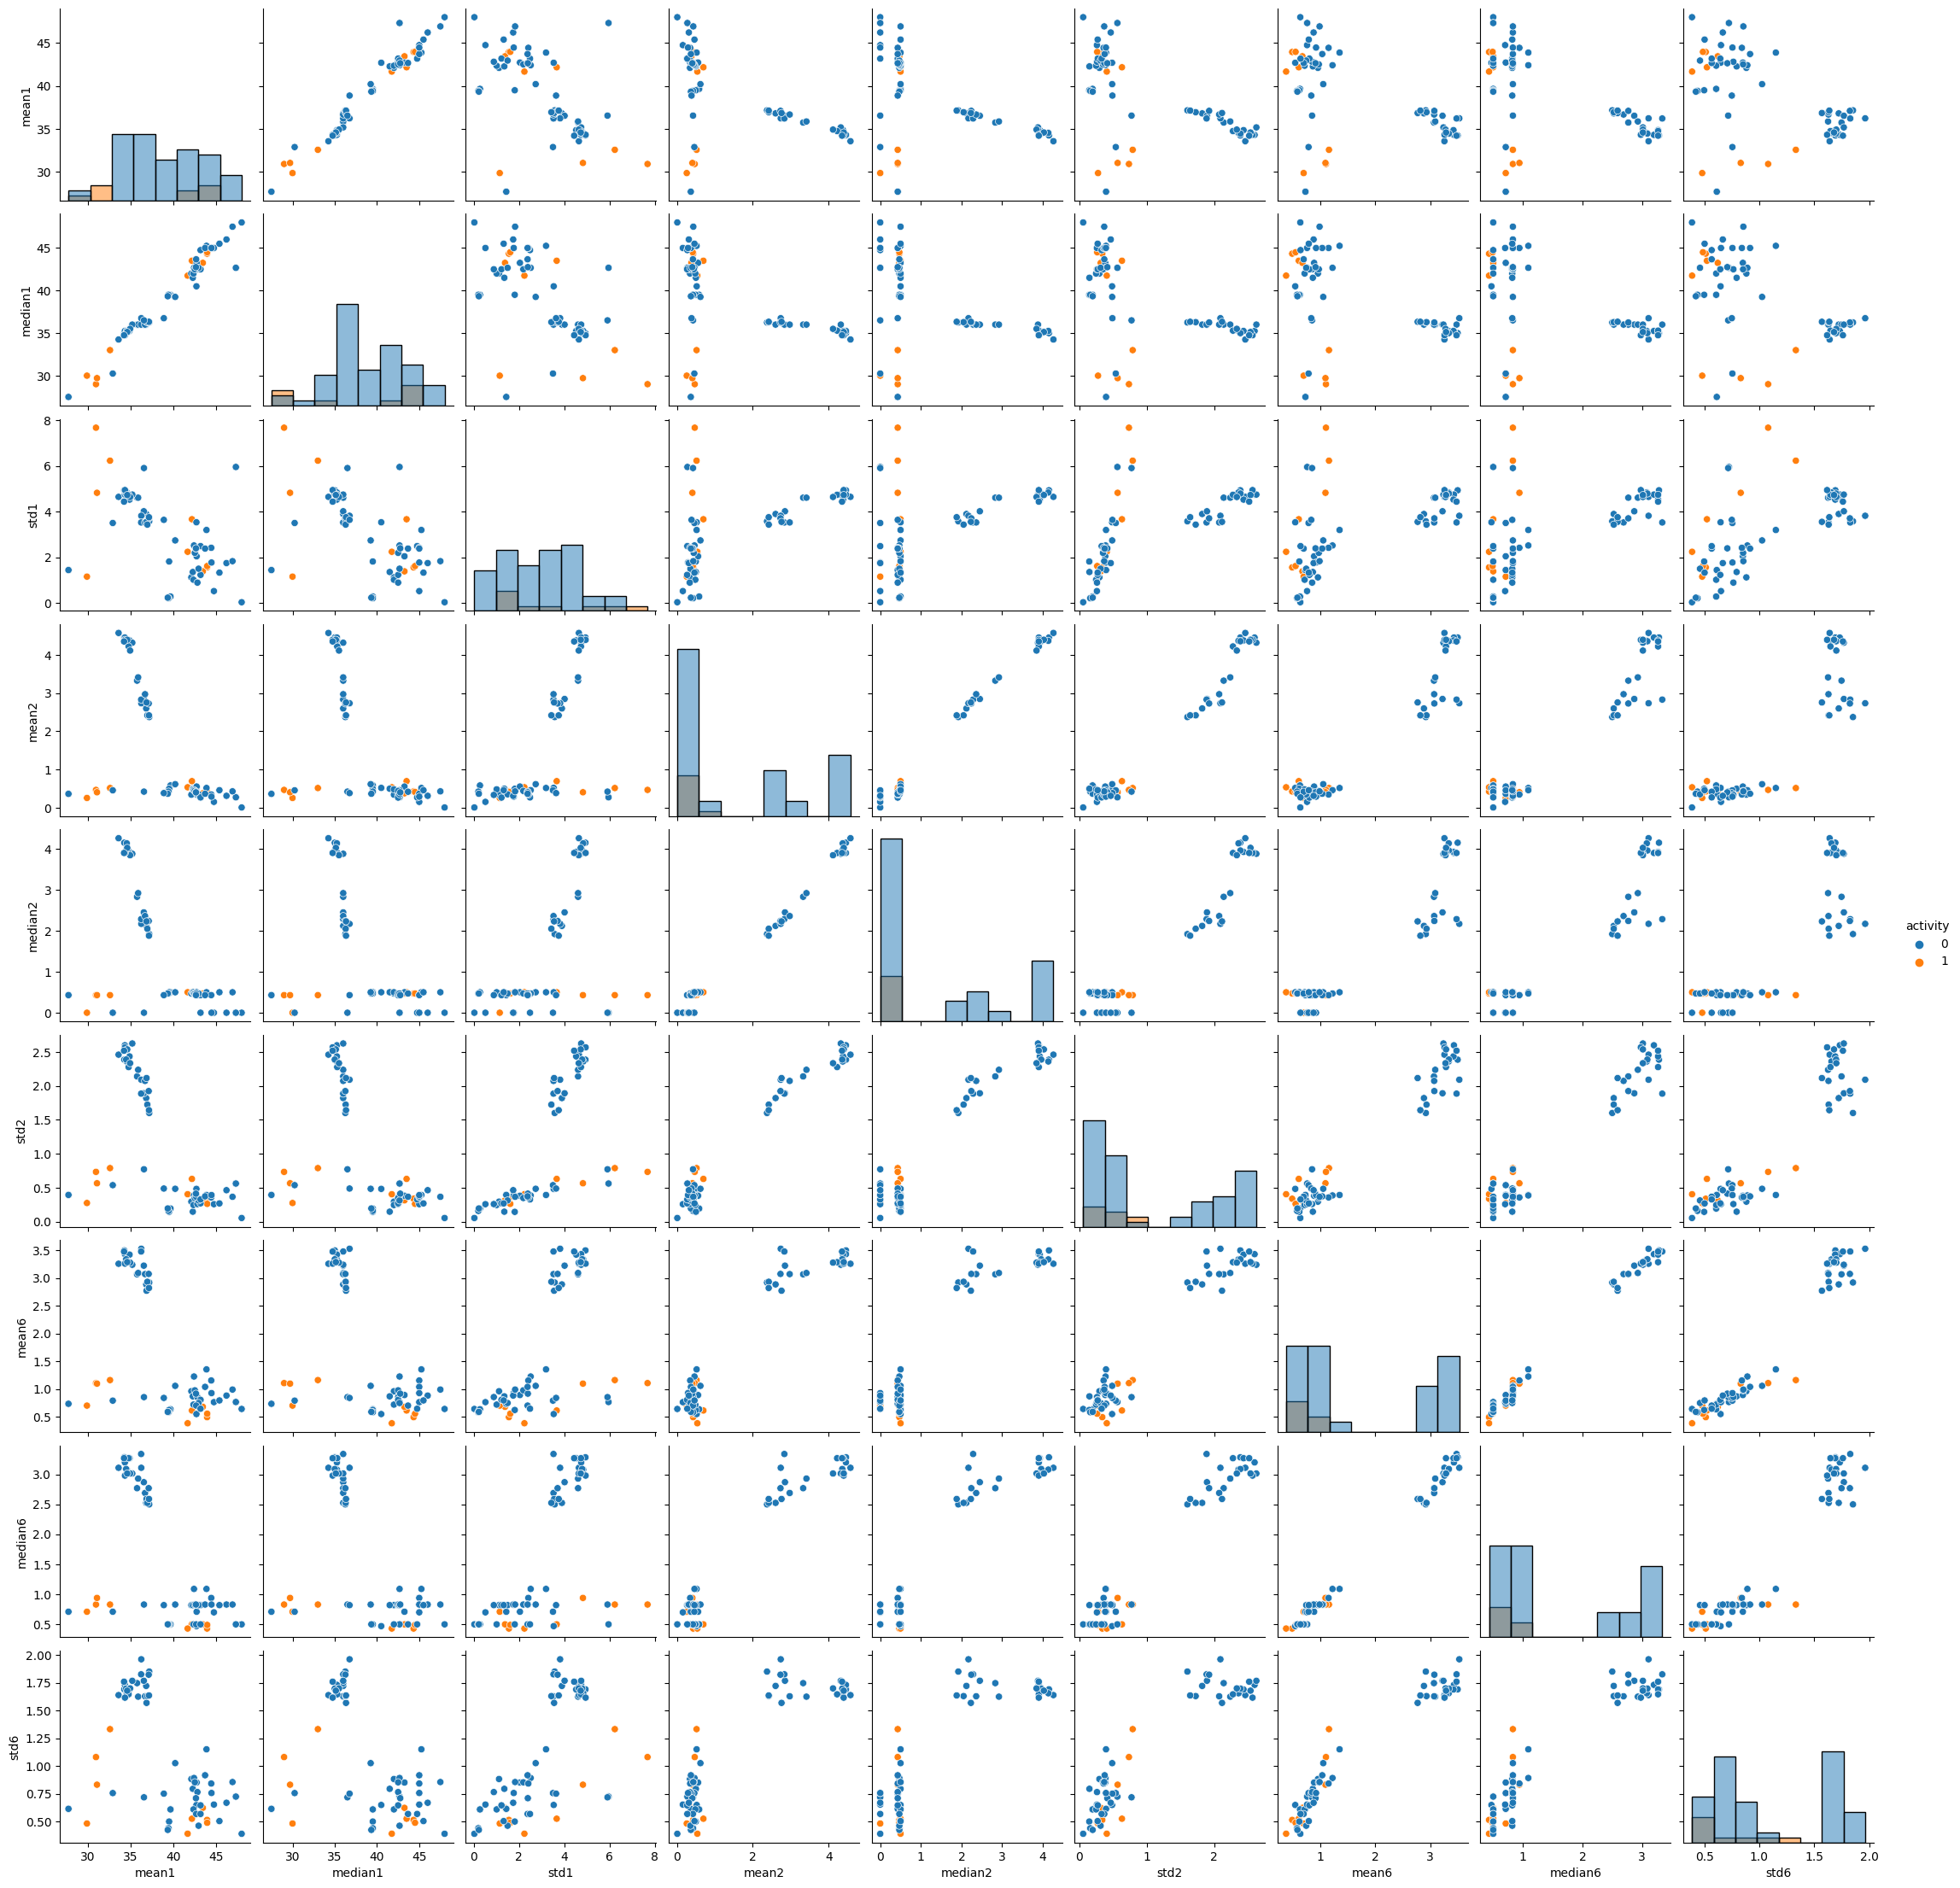

In [342]:
sns.pairplot(data=df_train_specified_features_binary,hue='activity',diag_kind="hist")

ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

In [343]:
activities = ['bending1','bending2','cycling','lying','sitting','standing','walking']
df_final_train = []
df_final_train_specified_features = []

for activity in activities:
    path = r'../data/AReM/'
    path = path + activity
    files = Path(path).glob('*.csv') 
    for file in files:
        s = str(file)
        temp1 = []
        temp2 = []
        instance = s[len(s)-12:-4]
        df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
        if activity == 'bending1' or activity == 'bending2':
            if 'dataset1.csv' in s or 'dataset2.csv' in s:
                pass
            else:
                for ind in df.index:
                    if ind%2 == 0:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        temp1.append(row)
                    else:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind],activity]
                        temp2.append(row)
        else:
            if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                pass
            else:
                for ind in df.index:
                    if ind%2 == 0:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        temp1.append(row)
                    else:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind],activity]
                        temp2.append(row)
                        
        if len(temp1)!=0 and len(temp2) !=0:
            temp1 = pd.DataFrame(temp1)
            temp1.columns = ['avg_rss12_1', 'var_rss12_1', 'avg_rss13_1','var_rss13_1','avg_rss23_1','var_rss23_1']
            temp2 = pd.DataFrame(temp2)
            temp2.columns = ['avg_rss12_2', 'var_rss12_2', 'avg_rss13_2','var_rss13_2','avg_rss23_2','var_rss23_2','activity']
            for column in temp2.columns:
                temp1 = temp1.join(temp2[column])
            x_arr = [temp1['avg_rss12_1'].mean(),temp1['avg_rss12_2'].mean(),
                    temp1['avg_rss12_1'].median(),temp1['avg_rss12_2'].median(),
                    temp1['avg_rss12_1'].std(),temp1['avg_rss12_2'].std(),
                    temp1['var_rss12_1'].mean(),temp1['var_rss12_2'].mean(),
                    temp1['var_rss12_1'].median(),temp1['var_rss12_2'].median(),
                    temp1['var_rss12_1'].std(),temp1['var_rss12_2'].std(),
                    temp1['var_rss23_1'].mean(),temp1['var_rss23_2'].mean(),
                    temp1['var_rss23_1'].median(),temp1['var_rss23_2'].median(),
                    temp1['var_rss23_1'].std(),temp1['var_rss23_2'].std(),activity]
            df_final_train_specified_features.append(x_arr)
            df_final_train.append(temp1)
            
df_final_train_specified_features = pd.DataFrame(df_final_train_specified_features)
df_final_train_specified_features.columns = ['avg_rss12_1_mean','avg_rss12_2_mean',
                                            'avg_rss12_1_median','avg_rss12_2_median',
                                            'avg_rss12_1_std','avg_rss12_2_std',
                                            'var_rss12_1_mean','var_rss12_2_mean',
                                            'var_rss12_1_median','var_rss12_2_median',
                                            'var_rss12_1_std','var_rss12_2_std',
                                            'var_rss23_1_mean','var_rss23_2_mean',
                                            'var_rss23_1_median','var_rss23_2_median',
                                            'var_rss23_1_std','var_rss23_2_std','activity']
df_final_train = pd.concat(df_final_train)
df_final_train

avg_rss12_1  var_rss12_1  avg_rss13_1  var_rss13_1  avg_rss23_1  \
0          42.00         0.71        21.25         0.43        30.00   
1          41.50         0.50        14.25         1.92        33.00   
2          40.00         0.71        20.00         2.74        32.75   
3          42.25         0.43        23.75         0.43        35.25   
4          42.75         0.83        21.25         0.43        36.00   
..           ...          ...          ...          ...          ...   
235        28.00         3.24        15.00         0.00        21.67   
236        36.00         0.00        18.50         4.15        15.00   
237        37.25         7.26        14.00         1.58        13.25   
238        27.33         1.25        11.33         0.94        20.00   
239        33.75         1.30        15.75         5.21        16.50   

     var_rss23_1  avg_rss12_2  var_rss12_2  avg_rss13_2  var_rss13_2  \
0           0.00        41.50         0.50        20.25         1.48   
1           0.00        40.75         0.83        15.75         0.43   
2           0.43        41.25         0.83        24.25         0.43   
3           1.30        43.50         0.87        21.00         0.00   
4           0.00        43.25         0.43        23.75         0.43   
..           ...          ...          ...          ...          ...   
235         5.56        34.50         1.50        17.00         1.73   
236         2.45        36.00         2.45        14.75         4.55   
237         4.92        31.50         1.66        12.50         3.20   
238         4.00        37.80         7.68        14.20         2.48   
239         2.69        32.67         3.09        18.67         0.47   

     avg_rss23_2  var_rss23_2  activity  
0          31.25         1.09  bending1  
1          33.00         0.00  bending1  
2          31.50         0.87  bending1  
3          36.00         0.00  bending1  
4          36.00         0.00  bending1  
..           ...          ...       ...  
235        15.00         4.74   walking  
236        14.67         3.40   walking  
237        14.25         4.44   walking  
238        17.25         0.83   walking  
239        14.00         3.16   walking  

[16560 rows x 13 columns]

In [344]:
df_final_train_specified_features

avg_rss12_1_mean  avg_rss12_2_mean  avg_rss12_1_median  \
0          43.955917         43.953083              44.415   
1          42.194083         42.165542              43.710   
2          41.691042         41.665083              41.750   
3          43.464583         43.445333              43.290   
4          43.969292         43.968958              44.500   
..               ...               ...                 ...   
64         34.765917         34.760750              35.290   
65         34.955958         34.915667              35.500   
66         34.310792         34.355292              34.750   
67         34.494542         34.705208              35.000   
68         34.404917         34.046833              35.000   

    avg_rss12_2_median  avg_rss12_1_std  avg_rss12_2_std  var_rss12_1_mean  \
0                44.33         1.568614         1.552272          0.427208   
1                43.50         3.683760         3.665167          0.687833   
2                41.75         2.218678         2.272594          0.544750   
3                43.25         1.403855         1.370977          0.378417   
4                44.50         1.619846         1.620265          0.410667   
..                 ...              ...              ...               ...   
64               35.29         4.663926         4.828970          4.396875   
65               35.50         5.109438         4.141587          3.875750   
66               34.75         5.230051         4.661404          4.312417   
67               35.25         4.735910         4.735211          4.293250   
68               34.50         4.523927         4.360205          4.336125   

    var_rss12_2_mean  var_rss12_1_median  var_rss12_2_median  var_rss12_1_std  \
0           0.425292               0.470               0.495         0.337775   
1           0.704250               0.500               0.500         0.607043   
2           0.527208               0.500               0.500         0.429981   
3           0.377750               0.470               0.470         0.316661   
4           0.415583               0.470               0.470         0.257952   
..               ...                 ...                 ...              ...   
64          4.050708               4.225               3.670         2.349894   
65          4.355750               3.550               4.030         2.239323   
66          4.481500               3.900               3.920         2.395768   
67          4.504417               3.865               4.100         2.633445   
68          4.372875               3.900               4.120         2.629463   

    var_rss12_2_std  var_rss23_1_mean  var_rss23_2_mean  var_rss23_1_median  \
0          0.340306          0.471542          0.515042                0.43   
1          0.654979          0.591833          0.635208                0.47   
2          0.380078          0.379375          0.387208                0.43   
3          0.315129          0.669250          0.690042                0.50   
4          0.268687          0.555625          0.555000                0.47   
..              ...               ...               ...                 ...   
64         2.195029          3.284542          3.292000                3.30   
65         2.408170          3.203500          3.356542                2.87   
66         2.733090          3.283958          3.239208                2.98   
67         2.440844          3.289833          3.289250                2.87   
68         2.408821          3.506458          3.452625                3.27   

    var_rss23_2_median  var_rss23_1_std  var_rss23_2_std  activity  
0                0.450         0.505535         0.521502  bending1  
1                0.500         0.510361         0.538102  bending1  
2                0.430         0.390183         0.388919  bending1  
3                0.500         0.521065         0.710628  bending1  
4                0.500         0.510909         0.46466

In [345]:
df_final_train_specified_features_binary = df_final_train_specified_features.copy()

df_final_train_specified_features_binary.loc[df_final_train_specified_features_binary['activity'].str.contains('bending', case=False), 'activity'] = 1
df_final_train_specified_features_binary['activity']=df_final_train_specified_features_binary['activity'].apply(lambda k: k if np.isreal(k) else 0)

df_final_train_specified_features_binary

avg_rss12_1_mean  avg_rss12_2_mean  avg_rss12_1_median  \
0          43.955917         43.953083              44.415   
1          42.194083         42.165542              43.710   
2          41.691042         41.665083              41.750   
3          43.464583         43.445333              43.290   
4          43.969292         43.968958              44.500   
..               ...               ...                 ...   
64         34.765917         34.760750              35.290   
65         34.955958         34.915667              35.500   
66         34.310792         34.355292              34.750   
67         34.494542         34.705208              35.000   
68         34.404917         34.046833              35.000   

    avg_rss12_2_median  avg_rss12_1_std  avg_rss12_2_std  var_rss12_1_mean  \
0                44.33         1.568614         1.552272          0.427208   
1                43.50         3.683760         3.665167          0.687833   
2                41.75         2.218678         2.272594          0.544750   
3                43.25         1.403855         1.370977          0.378417   
4                44.50         1.619846         1.620265          0.410667   
..                 ...              ...              ...               ...   
64               35.29         4.663926         4.828970          4.396875   
65               35.50         5.109438         4.141587          3.875750   
66               34.75         5.230051         4.661404          4.312417   
67               35.25         4.735910         4.735211          4.293250   
68               34.50         4.523927         4.360205          4.336125   

    var_rss12_2_mean  var_rss12_1_median  var_rss12_2_median  var_rss12_1_std  \
0           0.425292               0.470               0.495         0.337775   
1           0.704250               0.500               0.500         0.607043   
2           0.527208               0.500               0.500         0.429981   
3           0.377750               0.470               0.470         0.316661   
4           0.415583               0.470               0.470         0.257952   
..               ...                 ...                 ...              ...   
64          4.050708               4.225               3.670         2.349894   
65          4.355750               3.550               4.030         2.239323   
66          4.481500               3.900               3.920         2.395768   
67          4.504417               3.865               4.100         2.633445   
68          4.372875               3.900               4.120         2.629463   

    var_rss12_2_std  var_rss23_1_mean  var_rss23_2_mean  var_rss23_1_median  \
0          0.340306          0.471542          0.515042                0.43   
1          0.654979          0.591833          0.635208                0.47   
2          0.380078          0.379375          0.387208                0.43   
3          0.315129          0.669250          0.690042                0.50   
4          0.268687          0.555625          0.555000                0.47   
..              ...               ...               ...                 ...   
64         2.195029          3.284542          3.292000                3.30   
65         2.408170          3.203500          3.356542                2.87   
66         2.733090          3.283958          3.239208                2.98   
67         2.440844          3.289833          3.289250                2.87   
68         2.408821          3.506458          3.452625                3.27   

    var_rss23_2_median  var_rss23_1_std  var_rss23_2_std  activity  
0                0.450         0.505535         0.521502         1  
1                0.500         0.510361         0.538102         1  
2                0.430         0.390183         0.388919         1  
3                0.500         0.521065         0.710628         1  
4                0.500         0.510909         0.46466

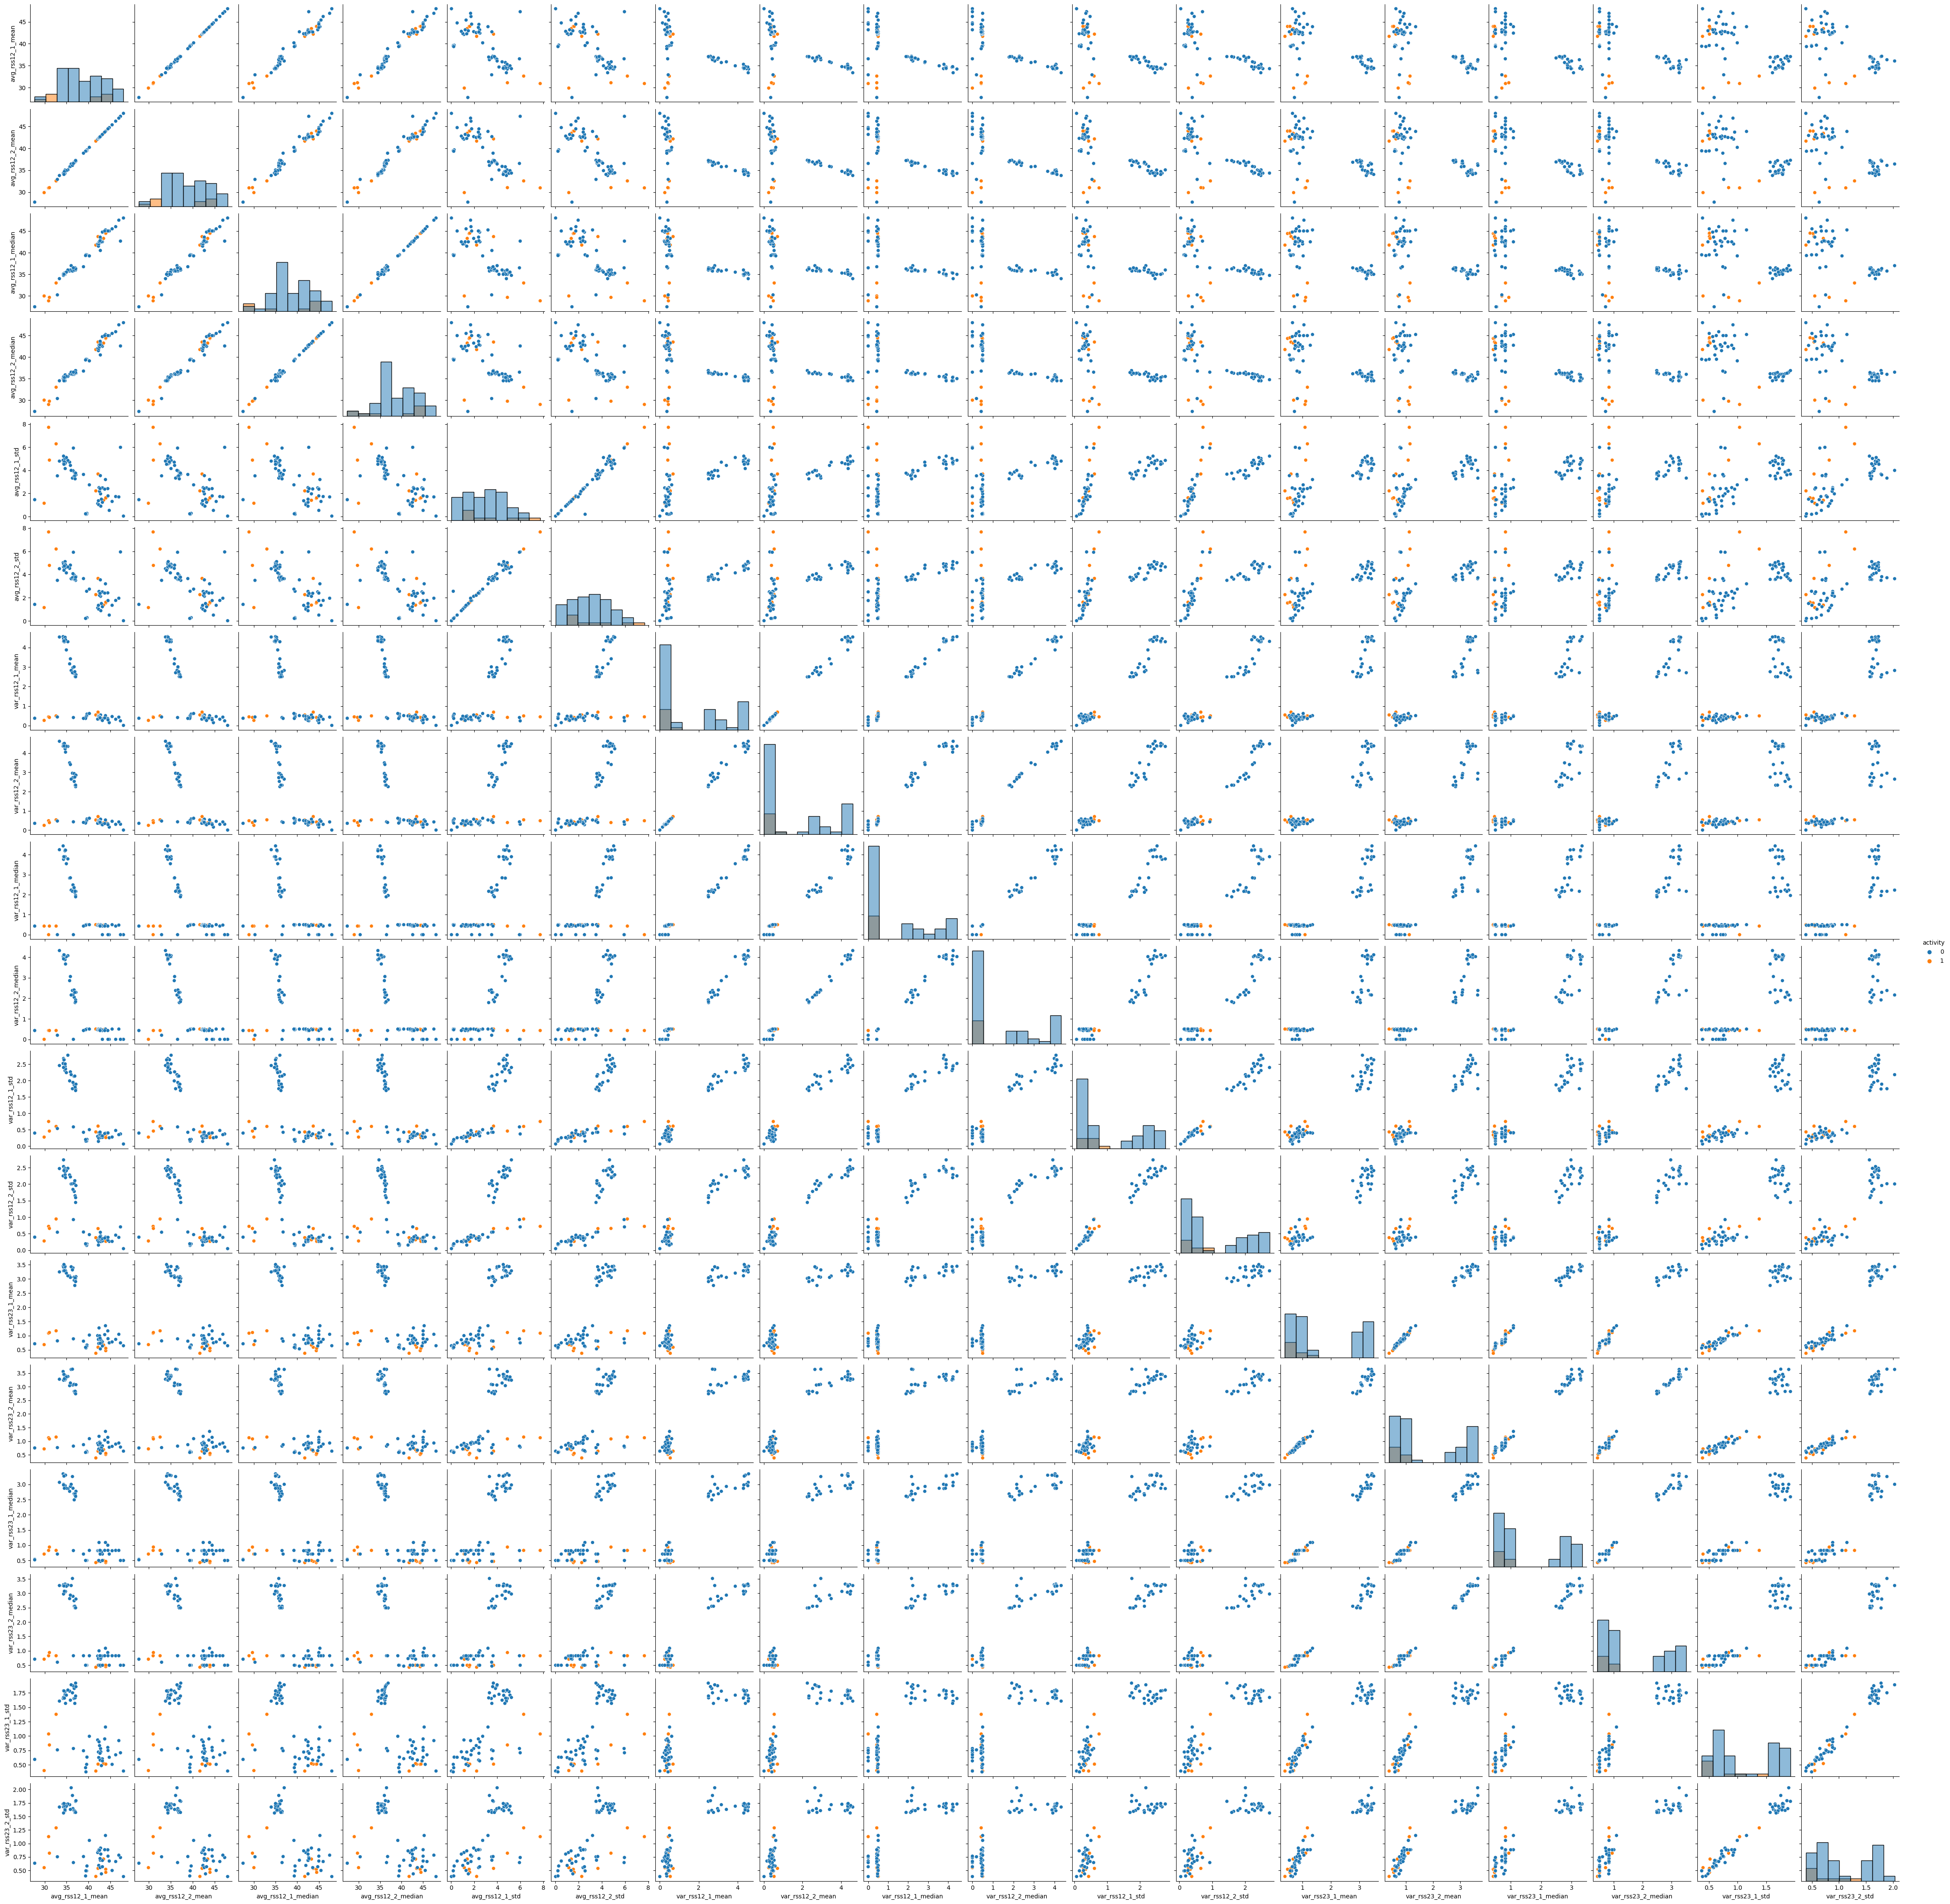

In [346]:
sns.pairplot(data=df_final_train_specified_features_binary,hue='activity',diag_kind="hist")

iii.
Break each time series in your training set into l ∈ {1,2, . . . ,20} time series of approximately equal length and use logistic regression 5 to solve the binary classification problem, using time-domain features. Remember that breaking
each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. 6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem.7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratifiedcross validation.
Research what it means and use it if needed.

In [151]:
activities = ['bending1','bending2','cycling','lying','sitting','standing','walking']
best_l = 0
best_accuracy = -1
p = 0
l_value = []
p_value = []
features = []
cv_mean_score = []
best_df = []
best_features = []


def apply_logistic_regression(l,df,best_accuracy,best_l,p,best_features,best_df):
    df_final_train_binary = df.copy()
    df_temp = df_final_train_binary[df_final_train_binary.columns[-1]]
    df_temp = pd.DataFrame(df_temp)
    df_temp.columns = ['activities']
    df_temp.loc[df_temp['activities'].str.contains('bending', case=False),'activities'] = 0
    df_temp['activities']=df_temp['activities'].apply(lambda k: k if np.isreal(k) else 1)
    X = np.array(df_final_train_binary.iloc[:,:-1])
    y = np.array(df_temp['activities']).reshape(-1, 1).ravel()
    lm = LogisticRegression(C = math.inf,tol=1e-6, max_iter=500)
    selector = RFECV(estimator=lm,cv = StratifiedKFold(n_splits=5),scoring='accuracy')
    selector.fit(X, y)
    l_value.append(l)
    features.append(list(selector.get_feature_names_out()))
    cv_mean_score.append(max(selector.cv_results_["mean_test_score"]))
    p_value.append(selector.n_features_)
    accuracy = max(selector.cv_results_["mean_test_score"])
    if best_accuracy < accuracy:
        best_accuracy = accuracy
        best_features = list(selector.get_feature_names_out())
        best_df = df
        p = selector.n_features_
        best_l = l
    return best_accuracy,best_l,p,best_features,best_df


def divide_dataframe(df, n):
    num_rows = math.floor(len(df) / n)
    parts = [df.iloc[i*num_rows:(i+1)*num_rows].reset_index(drop=True) for i in range(n)]
    concatenated_df = pd.concat(parts, axis=1)
    return concatenated_df

for l in range(1,21):
    final_data = []
    generated_columns = []
    for i in range(1,l+1):
        for j in range(1,temp_x+1):
            s1 = "mean"+str(j)+"_"+str(i)
            s2 = "median"+str(j)+"_"+str(i)
            s3 = "stdeviation"+str(j)+"_"+str(i)
            generated_columns.append(s1)
            generated_columns.append(s2)
            generated_columns.append(s3)
    generated_columns.append("activities")      
    for activity in activities:
        path = r'../data/AReM/'
        path = path + activity
        files = Path(path).glob('*.csv') 
        for file in files:
            data = []
            s = str(file)
            df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
            if activity == 'bending1' or activity == 'bending2':
                if 'dataset1.csv' in s or 'dataset2.csv' in s:
                    pass
                else:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            else:
                if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                    pass
                else:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            if len(data)!=0:
                data = pd.DataFrame(data)
                res = divide_dataframe(data,l)
                cols = [x for x in range(0,res.shape[1])]
                res.columns = cols
                row = []
                for col in range(0,res.shape[1]):
                    row.append(res[col].mean())
                    row.append(res[col].median())
                    row.append(res[col].std())
                row.append(activity)
                final_data.append(row)
    final_data = pd.DataFrame(final_data)
    final_data.columns = generated_columns
    best_accuracy,best_l,p,best_features,best_df = apply_logistic_regression(l,final_data,best_accuracy,best_l,p,best_features,best_df)

In [166]:
df_values = pd.DataFrame(l_value)
df_values.insert(1,'p_value',p_value)
df_values.insert(2,'cv_mean_score',cv_mean_score)
df_values.columns = ['l_value','p_value','cv_mean_score']
df_values

l_value  p_value  cv_mean_score
0         1        8       0.956044
1         2        4       0.971429
2         3       13       0.957143
3         4       55       0.956044
4         5        7       0.957143
5         6        2       0.985714
6         7        1       0.957143
7         8      128       0.970330
8         9       12       0.971429
9        10       78       0.985714
10       11       15       0.985714
11       12      131       0.985714
12       13       29       0.985714
13       14       41       0.971429
14       15      182       0.985714
15       16      134       0.985714
16       17       83       0.985714
17       18       90       0.985714
18       19      124       0.985714
19       20      236       0.985714

In [167]:
df = pd.DataFrame()
col_names = best_df.columns
for x in best_features:
    z = x[1:]
    colID = int(z)
    df[col_names[colID]] = best_df[col_names[colID]]
df['activities'] = best_df['activities']
df

mean5_1    mean1_5 activities
0   35.906250  44.075750   bending1
1   36.799500  40.835625   bending1
2   29.845750  41.600750   bending1
3   24.856250  42.978625   bending1
4   24.358625  43.661500   bending1
..        ...        ...        ...
64  16.576500  34.688375    walking
65  16.020125  34.874000    walking
66  15.971000  34.961625    walking
67  16.086875  34.176250    walking
68  16.096875  33.944750    walking

[69 rows x 3 columns]

In [168]:
print(f"The best (l,p) obtained is : {best_l,p}")

The best (l,p) obtained is : (6, 2)


iv.Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [169]:
df_binary_train = df.copy()
df_binary_train.loc[df_binary_train['activities'].str.contains('bending', case=False),'activities'] = 1
df_binary_train['activities']=df_binary_train['activities'].apply(lambda k: k if np.isreal(k) else 0)
X_train = df_binary_train[df_binary_train.columns[:-1]]
y_train = df_binary_train[['activities']]

X_b = sm.add_constant(X_train)
linear_regression = sm.Logit(y_train, X_b).fit(maxiter=15)
print(linear_regression.summary())

lm_f = LogisticRegression(C = math.inf, tol=1e-6, max_iter=500).fit(X_train, y_train)
y_train_pred_prob = list(lm_f.predict_proba(X_train)[:, 1])
y_train_pred = list(map(lambda x: int(x > 0.5), y_train_pred_prob))


cm = confusion_matrix(y_train, y_train_pred) 
print("Confusion Matrix:\n", cm)

         Current function value: 0.000004
         Iterations: 15
                           Logit Regression Results                           
Dep. Variable:             activities   No. Observations:                   69
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        00:01:28   Log-Likelihood:            -0.00028612
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 2.493e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.2836    616.804     -0.093      0.926   -1266.196    1151.629
mean5_1       12.7182     82.652      0.154      0.878    -149.27

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [170]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_train_pred_prob)

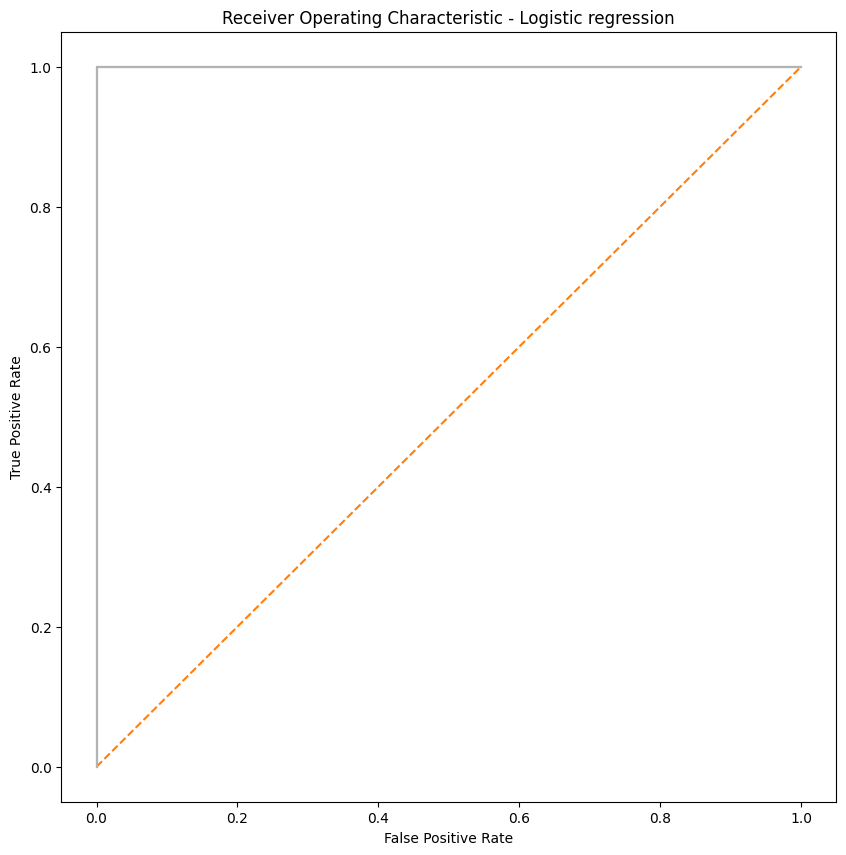

In [171]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [172]:
print('AUC curve', roc_auc_score(y_train, y_train_pred_prob))

AUC curve 1.0


v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [198]:
df_test_optimal = []
def divide_dataframe(df, n):
    num_rows = math.floor(len(df) / n)
    parts = [df.iloc[i*num_rows:(i+1)*num_rows].reset_index(drop=True) for i in range(n)]
    concatenated_df = pd.concat(parts, axis=1)
    return concatenated_df

for l in range(6,7):
    generated_columns = []
    for i in range(1,l+1):
        for j in range(1,temp_x+1):
            s1 = "mean"+str(j)+"_"+str(i)
            s2 = "median"+str(j)+"_"+str(i)
            s3 = "stdeviation"+str(j)+"_"+str(i)
            generated_columns.append(s1)
            generated_columns.append(s2)
            generated_columns.append(s3)
    generated_columns.append("activities")      
    for activity in activities:
        path = r'../data/AReM/'
        path = path + activity
        files = Path(path).glob('*.csv') 
        for file in files:
            data = []
            s = str(file)
            df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
            if activity == 'bending1' or activity == 'bending2':
                if 'dataset1.csv' in s or 'dataset2.csv' in s:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            else:
                if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                     for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
                        
            if len(data)!=0:
                data = pd.DataFrame(data)
                res = divide_dataframe(data,l)
                cols = [x for x in range(0,res.shape[1])]
                res.columns = cols
                row = []
                for col in range(0,res.shape[1]):
                    row.append(res[col].mean())
                    row.append(res[col].median())
                    row.append(res[col].std())
                row.append(activity)
                df_test_optimal.append(row)
    df_test_optimal = pd.DataFrame(df_test_optimal)
    df_test_optimal.columns = generated_columns

In [199]:
df_test_optimal

mean1_1  median1_1  stdeviation1_1   mean2_1  median2_1  stdeviation2_1  \
0   40.927250     41.500        0.941100  0.470125      0.500        0.215838   
1   43.418500     43.500        0.327345  0.557000      0.500        0.139868   
2   21.608250     22.000        2.861605  0.909000      0.710        0.984246   
3   28.634250     29.500        1.441585  0.102375      0.000        0.205705   
4   36.743875     35.625        3.769307  2.335750      2.025        1.355993   
5   37.432500     36.750        2.976509  2.079625      1.855        1.277223   
6   37.831125     36.670        3.116157  2.080625      1.355        2.109690   
7   28.660500     29.000        0.828945  0.288125      0.000        0.358757   
8   29.181125     29.000        0.531094  0.235375      0.000        0.262664   
9   48.000000     48.000        0.000000  0.000000      0.000        0.000000   
10  41.875125     42.000        0.299349  0.133375      0.000        0.269439   
11  46.813500     48.000        1.976128  0.298500      0.000        0.697809   
12  45.648625     45.500        0.509539  0.408375      0.470        0.232518   
13  46.364500     46.500        0.586569  0.455500      0.500        0.214823   
14  42.767375     43.250        1.388373  0.513250      0.500        0.306581   
15  44.135500     44.750        1.764845  0.418750      0.430        0.355137   
16  34.637000     36.000        4.859141  3.796250      3.555        2.259935   
17  34.272500     34.875        4.734169  4.564500      3.800        2.691514   
18  33.315375     34.000        4.512991  4.814250      4.570        2.325753   

      mean3_1  median3_1  stdeviation3_1   mean4_1  ...   mean4_6  median4_6  \
0   17.478125     17.000        4.389624  0.799000  ...  0.622375      0.470   
1   19.750875     20.500        4.234071  1.140375  ...  1.389375      0.905   
2   20.750625     21.500        3.517828  0.737500  ...  0.706625      0.470   
3   19.308875     20.165        3.187119  0.877000  ...  1.170000      0.830   
4   16.922375     17.500        3.202275  3.249750  ...  2.545250      2.415   
5   15.681125     15.625        3.056145  3.135625  ...  3.003750      2.910   
6   16.640625     17.750        4.223821  2.891000  ...  2.865000      2.540   
7    6.687875      7.000        1.935825  1.108375  ...  1.107375      0.940   
8    6.182375      6.125        1.981435  1.012875  ...  0.289500      0.430   
9    6.095875      6.000        0.589915  0.277250  ...  0.459125      0.430   
10  15.406750     15.585        2.403579  0.634250  ...  1.127000      0.830   
11  16.105875     16.750        6.577095  0.813750  ...  1.016875      0.710   
12  13.425625     13.250        3.933446  0.982750  ...  1.087125      0.905   
13  12.732625     12.000        2.953443  0.968625  ...  0.629625      0.485   
14  14.953000     15.125        2.007739  0.476875  ...  0.694625      0.500   
15  12.496750     14.500        4.305805  0.766375  ...  0.641500      0.430   
16  15.796750     16.000        3.104354  3.151500  ...  3.420500      3.095   
17  15.583875     16.000        3.023581  3.289250  ...  3.742500      3.705   
18  15.296750     15.500        3.072157  3.130875  ...  3.343625      3.115   

    stdeviation4_6    mean5_6  median5_6  stdeviation5_6   mean6_6  median6_6  \
0         0.577818  30.983250     30.000        1.955958  0.345875      0.430   
1         1.345636  32.370000     32.375        1.529732  0.384750      0.430   
2         1.034497  20.402875     20.875        2.307323  0.834500      0.710   
3         1.124008  21.075750     21.250        6.443786  1.941375      1.410   
4         1.497533  20.019500     20.585        2.499291  2.713125      2.315   
5         1.467421  20.424250     20.875        2.062709  2.491625      2.085   
6         1.749837  15.407500     15.625        3.495725  3.887250      3.685   
7         0.938226  10.819250     10.710        3.294578  0.905625      0.830   
8         0.266567   1.929875      1.750        0.92287

In [200]:
df_test_specified_features = pd.DataFrame()
col_names = df_test_optimal.columns
for x in best_features:
    z = x[1:]
    colID = int(z)
    df_test_specified_features[col_names[colID]] = df_test_optimal[col_names[colID]]
df_test_specified_features['activities'] = df_test_optimal['activities']
df_test_specified_features

mean5_1    mean1_5 activities
0   33.255625  39.237625   bending1
1   32.581250  43.473125   bending1
2   25.930125  24.145875   bending2
3   16.105500  25.499125   bending2
4   19.373500  37.586250    cycling
5   18.005500  37.398500    cycling
6   19.917875  37.202375    cycling
7    9.317875  28.388750      lying
8    9.594250  48.000000      lying
9    2.738500  48.012500      lying
10   9.071625  42.898875    sitting
11  15.937500  45.905500    sitting
12  17.767625  44.993750    sitting
13  17.696125  42.204250   standing
14  15.638750  42.596750   standing
15  15.479375  38.711500   standing
16  16.856250  34.786875    walking
17  16.614875  32.868375    walking
18  15.720750  38.103000    walking

In [201]:
df_test_binary = df_test_specified_features.copy()
df_test_binary.loc[df_test_binary['activities'].str.contains('bending', case=False),'activities'] = 1
df_test_binary['activities']=df_test_binary['activities'].apply(lambda k: k if np.isreal(k) else 0)
X_test = df_test_binary[df_test_binary.columns[:-1]]
y_test = df_test_binary[['activities']]

In [202]:
X_b = sm.add_constant(X_test)
linear_regression = sm.Logit(y_test, X_b).fit(maxiter=15)
print(linear_regression.summary())

lm_f = LogisticRegression(C = math.inf, tol=1e-6, max_iter=500).fit(X_test, y_test)
y_test_pred_prob = list(lm_f.predict_proba(X_test)[:, 1])
y_test_pred = list(map(lambda x: int(x > 0.5), y_test_pred_prob))


cm = confusion_matrix(y_test, y_test_pred) 
print("Confusion Matrix:\n", cm)

print('AUC curve', roc_auc_score(y_test, y_test_pred_prob))
print('Score for train',accuracy_score(y_train, y_train_pred));
print('Score for test',accuracy_score(y_test, y_test_pred))

         Current function value: 0.000001
         Iterations: 15
                           Logit Regression Results                           
Dep. Variable:             activities   No. Observations:                   19
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        00:21:23   Log-Likelihood:            -1.4042e-05
converged:                      False   LL-Null:                       -9.7784
Covariance Type:            nonrobust   LLR p-value:                 5.666e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.2802   1727.429      0.023      0.982   -3346.419    3424.980
mean5_1        3.9462     93.208      0.042      0.966    -178.73

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


vi.Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

There was a warning from stats model stating that "Maximum Likelihood optimization failed to converge". This happens mostly when
the dataset is linearly-separable

vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

In [184]:
oversample = SMOTE(random_state = 45)

activities = ['bending1','bending2','cycling','lying','sitting','standing','walking']
best_l_over = 0
best_accuracy_over = -1
p_over = 0
l_value_over = []
p_value_over = []
features_over = []
cv_mean_score_over = []
best_df_over = []
best_features_over = []


def apply_logistic_regression(l,df,best_accuracy_over,best_l_over,p_over,best_features_over,best_df_over):
    df_final_train_binary = df.copy()
    df_temp = df_final_train_binary[df_final_train_binary.columns[-1]]
    df_temp = pd.DataFrame(df_temp)
    df_temp.columns = ['activities']
    df_temp.loc[df_temp['activities'].str.contains('bending', case=False),'activities'] = 0
    df_temp['activities']=df_temp['activities'].apply(lambda k: k if np.isreal(k) else 1)
    X = np.array(df_final_train_binary.iloc[:,:-1])
    y = np.array(df_temp['activities']).reshape(-1, 1).ravel()
    X_over, y_over = oversample.fit_resample(X, y)
    lm = LogisticRegression(C = math.inf, tol=1e-6, max_iter=500)
    selector = RFECV(estimator=lm,cv = StratifiedKFold(n_splits=5),scoring='accuracy')
    selector.fit(X_over, y_over)
    l_value_over.append(l)
    features_over.append(list(selector.get_feature_names_out()))
    cv_mean_score_over.append(max(selector.cv_results_["mean_test_score"]))
    p_value_over.append(selector.n_features_)
    accuracy_over = max(selector.cv_results_["mean_test_score"])
    if best_accuracy_over < accuracy_over:
        best_accuracy_over = accuracy_over
        best_features_over = list(selector.get_feature_names_out())
        best_df_over = df
        p_over = selector.n_features_
        best_l_over = l
    return best_accuracy_over,best_l_over,p_over,best_features_over,best_df_over


def divide_dataframe(df, n):
    num_rows = math.floor(len(df) / n)
    parts = [df.iloc[i*num_rows:(i+1)*num_rows].reset_index(drop=True) for i in range(n)]
    concatenated_df = pd.concat(parts, axis=1)
    return concatenated_df

for l in range(1,21):
    final_data_over = []
    generated_columns = []
    for i in range(1,l+1):
        for j in range(1,temp_x+1):
            s1 = "mean"+str(j)+"_"+str(i)
            s2 = "median"+str(j)+"_"+str(i)
            s3 = "stdeviation"+str(j)+"_"+str(i)
            generated_columns.append(s1)
            generated_columns.append(s2)
            generated_columns.append(s3)
    generated_columns.append("activities")      
    for activity in activities:
        path = r'../data/AReM/'
        path = path + activity
        files = Path(path).glob('*.csv') 
        for file in files:
            data = []
            s = str(file)
            df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
            if activity == 'bending1' or activity == 'bending2':
                if 'dataset1.csv' in s or 'dataset2.csv' in s:
                    pass
                else:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            else:
                if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                    pass
                else:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            if len(data)!=0:
                data = pd.DataFrame(data)
                res = divide_dataframe(data,l)
                cols = [x for x in range(0,res.shape[1])]
                res.columns = cols
                row = []
                for col in range(0,res.shape[1]):
                    row.append(res[col].mean())
                    row.append(res[col].median())
                    row.append(res[col].std())
                row.append(activity)
                final_data_over.append(row)
    final_data_over = pd.DataFrame(final_data_over)
    final_data_over.columns = generated_columns
    best_accuracy_over,best_l_over,p_over,best_features_over,best_df_over = apply_logistic_regression(l,final_data_over,best_accuracy_over,best_l_over,p_over,best_features_over,best_df_over)

In [185]:
df_values = pd.DataFrame(l_value_over)
df_values.insert(1,'p_value',p_value_over)
df_values.insert(2,'cv_mean_score',cv_mean_score_over)
df_values.columns = ['l_value','p_value','cv_mean_score']
df_values

l_value  p_value  cv_mean_score
0         1        7       0.966667
1         2        7       0.975000
2         3        6       0.983333
3         4        4       0.983333
4         5        6       0.983333
5         6       21       0.983333
6         7       14       0.983333
7         8       15       0.983333
8         9        6       0.991667
9        10      177       0.991667
10       11      169       0.991667
11       12      170       0.991667
12       13      216       0.991667
13       14      170       0.991667
14       15      215       0.991667
15       16      210       0.991667
16       17        3       0.991667
17       18      200       0.991667
18       19      122       0.991667
19       20       10       0.991667

In [186]:
df = pd.DataFrame()
col_names = best_df_over.columns
for x in best_features_over:
    z = x[1:]
    colID = int(z)
    df[col_names[colID]] = best_df_over[col_names[colID]]
df['activities'] = best_df_over['activities']
df

median5_2    mean5_3  median5_3    mean1_6  median4_6  median3_8  \
0       36.50  37.013962      37.25  44.157358       0.50      19.25   
1       37.25  35.995283      36.00  41.296038       1.12      23.33   
2       28.25  28.858302      29.33  41.858113       0.50      19.50   
3       23.75  23.487547      23.50  42.436981       0.00      12.00   
4       29.75  22.813019      23.00  44.258113       0.43      15.00   
..        ...        ...        ...        ...        ...        ...   
64      16.25  16.694717      16.33  35.081698       3.08      15.00   
65      15.50  16.224340      17.00  35.789245       2.87      14.75   
66      17.00  15.559434      15.25  34.149434       3.09      16.00   
67      16.50  16.236981      16.25  34.433585       3.30      15.00   
68      16.75  16.620943      16.67  34.245283       2.87      14.25   

   activities  
0    bending1  
1    bending1  
2    bending1  
3    bending1  
4    bending1  
..        ...  
64    walking  
65    walking  
66    walking  
67    walking  
68    walking  

[69 rows x 7 columns]

In [188]:
print(f"The best (l,p) obtained is : {best_l_over,p_over}")

The best (l,p) obtained is : (9, 6)


In [189]:
df_binary = df.copy()
df_binary.loc[df_binary['activities'].str.contains('bending', case=False),'activities'] = 1
df_binary['activities']=df_binary['activities'].apply(lambda k: k if np.isreal(k) else 0)
X_train = df_binary[df_binary.columns[:-1]]
y_train = df_binary[['activities']]
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

X_b = sm.add_constant(X_train_over)
linear_regression = sm.Logit(y_train_over, X_b).fit(maxiter=15)
print(linear_regression.summary())

lm_f = LogisticRegression(C = math.inf, tol=1e-6, max_iter=500).fit(X_train_over, y_train_over)
y_train_pred_prob_over = list(lm_f.predict_proba(X_train_over)[:, 1])
y_train_pred_over = list(map(lambda x: int(x > 0.5), y_train_pred_prob_over))


cm = confusion_matrix(y_train_over, y_train_pred_over) 
print("Confusion Matrix:\n", cm)

         Current function value: 0.000000
         Iterations: 15
                           Logit Regression Results                           
Dep. Variable:             activities   No. Observations:                  120
Model:                          Logit   Df Residuals:                      113
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        00:16:58   Log-Likelihood:            -5.1123e-05
converged:                      False   LL-Null:                       -83.178
Covariance Type:            nonrobust   LLR p-value:                 2.666e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6455   2391.798      0.006      0.995   -4674.193    4701.484
median5_2      2.1221     82.670      0.026      0.980    -159.90

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [190]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train_over, y_train_pred_prob_over)

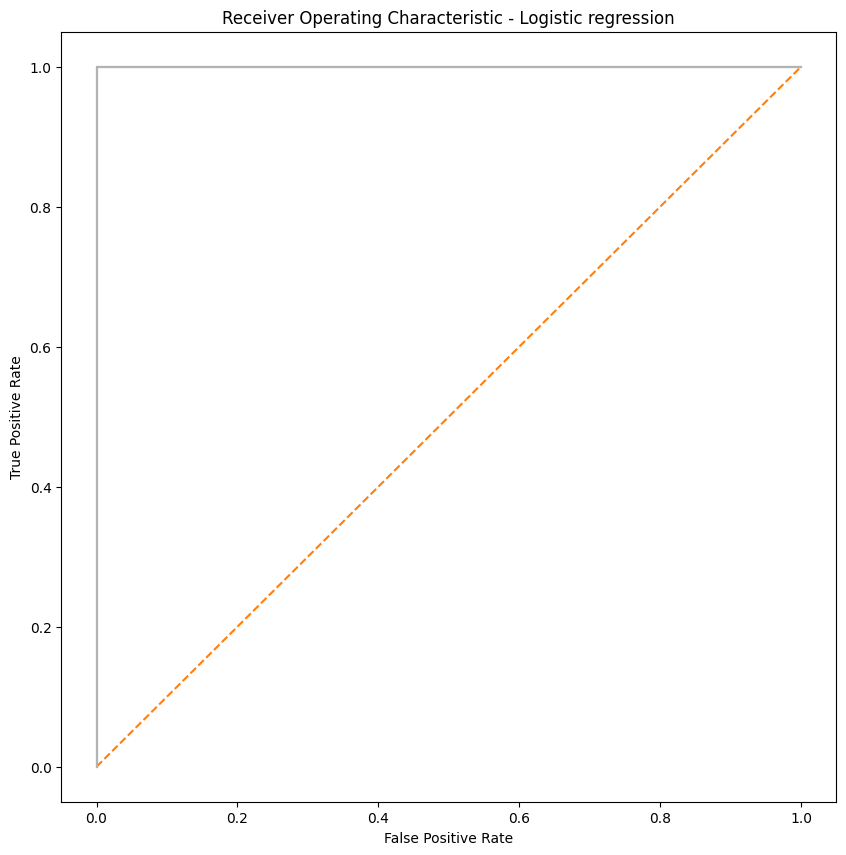

In [191]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [209]:
# For test
df_test_optimal_over = []
def divide_dataframe(df, n):
    num_rows = math.floor(len(df) / n)
    parts = [df.iloc[i*num_rows:(i+1)*num_rows].reset_index(drop=True) for i in range(n)]
    concatenated_df = pd.concat(parts, axis=1)
    return concatenated_df

for l in range(9,10):
    generated_columns = []
    for i in range(1,l+1):
        for j in range(1,temp_x+1):
            s1 = "mean"+str(j)+"_"+str(i)
            s2 = "median"+str(j)+"_"+str(i)
            s3 = "stdeviation"+str(j)+"_"+str(i)
            generated_columns.append(s1)
            generated_columns.append(s2)
            generated_columns.append(s3)
    generated_columns.append("activities")      
    for activity in activities:
        path = r'../data/AReM/'
        path = path + activity
        files = Path(path).glob('*.csv') 
        for file in files:
            data = []
            s = str(file)
            df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
            if activity == 'bending1' or activity == 'bending2':
                if 'dataset1.csv' in s or 'dataset2.csv' in s:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            else:
                if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                     for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
                        
            if len(data)!=0:
                data = pd.DataFrame(data)
                res = divide_dataframe(data,l)
                cols = [x for x in range(0,res.shape[1])]
                res.columns = cols
                row = []
                for col in range(0,res.shape[1]):
                    row.append(res[col].mean())
                    row.append(res[col].median())
                    row.append(res[col].std())
                row.append(activity)
                df_test_optimal_over.append(row)
    df_test_optimal_over = pd.DataFrame(df_test_optimal_over)
    df_test_optimal_over.columns = generated_columns

In [210]:
df_test_optimal_over

mean1_1  median1_1  stdeviation1_1   mean2_1  median2_1  stdeviation2_1  \
0   40.514340      40.50        0.899477  0.543962       0.50        0.175547   
1   43.423019      43.50        0.382907  0.559057       0.50        0.144785   
2   20.954340      21.33        2.748676  0.982453       0.82        1.040334   
3   27.980943      27.00        1.359795  0.111321       0.00        0.217936   
4   36.688679      35.75        3.823827  2.341132       2.12        1.426547   
5   37.364717      36.75        3.022851  2.119623       1.79        1.224872   
6   37.666792      36.67        3.153941  2.157925       1.50        2.348524   
7   28.990566      29.00        0.223094  0.127170       0.00        0.204924   
8   28.930566      29.00        0.437495  0.196604       0.00        0.255094   
9   48.000000      48.00        0.000000  0.000000       0.00        0.000000   
10  41.995283      42.00        0.059859  0.024340       0.00        0.100317   
11  47.655660      48.00        1.941258  0.352642       0.00        0.838323   
12  45.477925      45.50        0.424977  0.370566       0.43        0.234303   
13  46.488868      46.50        0.423600  0.444151       0.50        0.196679   
14  42.817170      43.33        1.669967  0.527736       0.50        0.329070   
15  43.660566      44.50        1.990653  0.456792       0.43        0.396139   
16  34.940943      36.00        4.733757  3.714717       3.57        2.275802   
17  34.137736      35.33        4.988103  4.443019       3.86        2.455623   
18  32.732453      33.50        4.622686  5.038868       5.31        2.328480   

      mean3_1  median3_1  stdeviation3_1   mean4_1  ...   mean4_9  median4_9  \
0   19.556604      19.75        3.484321  0.527358  ...  0.668868       0.50   
1   19.633585      20.50        4.350484  1.310566  ...  1.633585       1.12   
2   22.040189      22.00        1.912820  0.526981  ...  0.325849       0.43   
3   18.851509      19.00        3.737428  1.047925  ...  0.972075       0.71   
4   17.016415      17.50        3.523593  3.363019  ...  2.698302       2.45   
5   15.583019      15.00        3.163099  3.252453  ...  3.002642       2.83   
6   16.753208      17.50        4.352026  2.876604  ...  2.617358       2.05   
7    6.937736       7.25        1.449368  0.892075  ...  1.146415       0.94   
8    5.655660       6.00        1.714275  0.526981  ...  0.276226       0.43   
9    6.034717       6.00        0.675314  0.274717  ...  0.477358       0.43   
10  16.513208      16.50        1.440581  0.587547  ...  0.892830       0.71   
11  18.442642      21.00        5.517166  0.592642  ...  1.056415       0.83   
12  13.225849      13.25        3.520804  0.850566  ...  1.030566       0.87   
13  12.957925      12.00        2.633705  0.637358  ...  0.730755       0.50   
14  15.086415      15.25        2.296123  0.479623  ...  0.636226       0.47   
15  10.933774      12.00        4.514038  0.915472  ...  0.533962       0.43   
16  15.512642      16.00        3.086772  3.242642  ...  3.454340       2.92   
17  16.159811      16.50        3.140886  3.189245  ...  3.776604       3.57   
18  15.477925      15.50        2.709481  2.999811  ...  3.632453       3.64   

    stdeviation4_9    mean5_9  median5_9  stdeviation5_9   mean6_9  median6_9  \
0         0.626479  31.537547      31.00        2.196991  0.410943       0.43   
1         1.478460  31.979811      32.00        0.996271  0.326226       0.43   
2         0.290182  21.292075      21.25        1.339472  0.617736       0.50   
3         1.085997  23.660000      25.00        5.789812  1.975472       1.41   
4         1.621534  19.898868      20.50        2.537571  2.748302       2.36   
5         1.623381  20.416415      21.00        2.149333  2.288868       2.00   
6         1.805503  15.700377      16.33        3.445864  3.928113       3.67   
7         1.032968  11.063019      10.50        2.301684  0.933585       0.83   
8         0.269153   1.830189       1.75        0.68169

In [213]:
df_test_specified_features_over = pd.DataFrame()
col_names = df_test_optimal_over.columns
for x in best_features_over:
    z = x[1:]
    colID = int(z)
    df_test_specified_features_over[col_names[colID]] = df_test_optimal_over[col_names[colID]]
df_test_specified_features_over['activities'] = df_test_optimal_over['activities']
df_test_specified_features_over

median5_2    mean5_3  median5_3    mean1_6  median4_6  median3_8  \
0       33.67  34.920755      35.25  39.018679       0.94      21.00   
1       33.00  34.204528      33.75  41.053208       1.30      22.00   
2       27.00  25.526038      26.50  21.920000       0.47      21.00   
3       17.25  18.709434      18.67  26.916415       0.82      23.75   
4       19.75  18.933962      19.67  37.522075       3.09      16.00   
5       19.67  19.534717      20.33  37.321321       2.38      18.75   
6       20.25  19.414906      20.25  36.801887       3.03      15.25   
7        9.00   9.462264       9.00  26.665283       0.71       4.00   
8        8.50   4.254717       4.50  48.000000       0.43       6.00   
9        4.00   5.221698       5.25  48.000000       0.43       6.00   
10      11.50  10.336604      10.67  43.464151       0.43      18.75   
11      17.50  21.926415      21.75  46.520755       0.43      20.67   
12      23.50  19.237170      19.67  45.147736       1.50      12.50   
13      17.75  16.956226      17.25  42.663208       0.83      13.50   
14      13.75  12.212264      12.25  43.066981       0.50      13.75   
15      16.67  17.317547      18.50  44.500755       0.47      14.50   
16      17.50  16.072830      16.25  33.411698       3.74      15.00   
17      16.25  15.434906      15.50  33.218679       2.55      16.33   
18      17.33  15.787736      15.75  34.911509       2.87      15.33   

   activities  
0    bending1  
1    bending1  
2    bending2  
3    bending2  
4     cycling  
5     cycling  
6     cycling  
7       lying  
8       lying  
9       lying  
10    sitting  
11    sitting  
12    sitting  
13   standing  
14   standing  
15   standing  
16    walking  
17    walking  
18    walking

In [216]:
df_test_binary = df_test_specified_features_over.copy()
df_test_binary.loc[df_test_binary['activities'].str.contains('bending', case=False),'activities'] = 1
df_test_binary['activities']=df_test_binary['activities'].apply(lambda k: k if np.isreal(k) else 0)
X_test = df_test_binary[df_test_binary.columns[:-1]]
y_test = df_test_binary[['activities']]

In [244]:
X_b = sm.add_constant(X_test)
linear_regression = sm.Logit(y_test, X_b).fit(maxiter=15)
print(linear_regression.summary())

lm_f = LogisticRegression(C = math.inf, tol=1e-6, max_iter=500).fit(X_test, y_test)
y_test_pred_prob = list(lm_f.predict_proba(X_test)[:, 1])
y_test_pred = list(map(lambda x: int(x > 0.5), y_test_pred_prob))


cm = confusion_matrix(y_test, y_test_pred) 
print("Confusion Matrix:\n", cm)

print('AUC curve', roc_auc_score(y_test, y_test_pred_prob))
print('Score for train',accuracy_score(y_train_over, y_train_pred_over));
print('Score for test',accuracy_score(y_test, y_test_pred))

         Current function value: 0.000000
         Iterations: 15
                           Logit Regression Results                           
Dep. Variable:             activities   No. Observations:                   19
Model:                          Logit   Df Residuals:                        9
Method:                           MLE   Df Model:                            9
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                   1.000
Time:                        01:21:20   Log-Likelihood:            -3.0768e-06
converged:                      False   LL-Null:                       -9.7784
Covariance Type:            nonrobust   LLR p-value:                   0.02085
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             18.6064   7545.388      0.002      0.998   -1.48e+04    1.48e+04
median1_1         -1.8343    708.400     -0.003      

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## (b)Binary Classification Using L1-penalized logistic regression

i. Repeat 2(a)iii using L1-penalized logistic regression,i.e. instead of using p-values for variable selection, use L1 regularization. Note that in this problem,you have to cross-validate for both l , the number of time series into which you
break each of your instances, and λ , the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [228]:
scaler = StandardScaler()

activities = ['bending1','bending2','cycling','lying','sitting','standing','walking']
best_l_l1 = 0
best_accuracy_l1 = -1
c_l1 = []
p_l1 = 0
l_value_l1 = []
p_value_l1 = []
features_l1 = []
cv_mean_score_l1 = []
best_df_l1 = []
best_features_l1 = []


def apply_logistic_regression(l,df,best_accuracy_l1,best_l_l1,p_l1,best_features_l1,best_df_l1):
    df_final_train_binary = df.copy()
    df_temp = df_final_train_binary[df_final_train_binary.columns[-1]]
    df_temp = pd.DataFrame(df_temp)
    df_temp.columns = ['activities']
    df_temp.loc[df_temp['activities'].str.contains('bending', case=False),'activities'] = 0
    df_temp['activities']=df_temp['activities'].apply(lambda k: k if np.isreal(k) else 1)
    X = df_final_train_binary[df_final_train_binary.columns[:-1]]
    y = df_temp['activities']
    X_scaled = scaler.fit_transform(X)
    lm = LogisticRegressionCV(Cs = 10, cv = StratifiedKFold(5), penalty = "l1", solver = "liblinear",
                            tol = 0.001, max_iter = 500, intercept_scaling = 10000.0)
    lm.fit(X_scaled, y)
    l_value_l1.append(l)
    c_l1.append(lm.C_[0])
    p_value_l1.append(np.count_nonzero(lm.coef_[0]))
    feature_ind = [i for i, e in enumerate(lm.coef_[0]) if e != 0]
    features_l1.append([list(X.columns)[feat] for feat in feature_ind])
    Cs_index = list(lm.Cs_).index(lm.C_)
    cv_mean_score_l1.append(np.mean(lm.scores_[1][:, Cs_index]))
    accuracy = np.mean(lm.scores_[1][:, Cs_index])
    if best_accuracy_l1 < accuracy:
        best_accuracy_l1 = accuracy
        best_features_l1 = [list(X.columns)[feat] for feat in feature_ind]
        best_df_l1 = df
        p_l1 = np.count_nonzero(lm.coef_[0])
        best_l_l1 = l
    return best_accuracy_l1,best_l_l1,p_l1,best_features_l1,best_df_l1


def divide_dataframe(df, n):
    num_rows = math.floor(len(df) / n)
    parts = [df.iloc[i*num_rows:(i+1)*num_rows].reset_index(drop=True) for i in range(n)]
    concatenated_df = pd.concat(parts, axis=1)
    return concatenated_df

for l in range(1,21):
    final_data_l1 = []
    generated_columns = []
    for i in range(1,l+1):
        for j in range(1,temp_x+1):
            s1 = "mean"+str(j)+"_"+str(i)
            s2 = "median"+str(j)+"_"+str(i)
            s3 = "stdeviation"+str(j)+"_"+str(i)
            generated_columns.append(s1)
            generated_columns.append(s2)
            generated_columns.append(s3)
    generated_columns.append("activities")      
    for activity in activities:
        path = r'../data/AReM/'
        path = path + activity
        files = Path(path).glob('*.csv') 
        for file in files:
            data = []
            s = str(file)
            df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
            if activity == 'bending1' or activity == 'bending2':
                if 'dataset1.csv' in s or 'dataset2.csv' in s:
                    pass
                else:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            else:
                if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                    pass
                else:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            if len(data)!=0:
                data = pd.DataFrame(data)
                res = divide_dataframe(data,l)
                cols = [x for x in range(0,res.shape[1])]
                res.columns = cols
                row = []
                for col in range(0,res.shape[1]):
                    row.append(res[col].mean())
                    row.append(res[col].median())
                    row.append(res[col].std())
                row.append(activity)
                final_data_l1.append(row)
    final_data_l1 = pd.DataFrame(final_data_l1)
    final_data_l1.columns = generated_columns
    best_accuracy_l1,best_l_l1,p_l1,best_features_l1,best_df_l1 = apply_logistic_regression(l,final_data_l1,best_accuracy_l1,best_l_l1,p_l1,best_features_l1,best_df_l1)

In [230]:
df_values_l1 = pd.DataFrame(l_value_l1)
df_values_l1.insert(1,'p_value',p_value_l1)
df_values_l1.insert(2,'C',c_l1)
df_values_l1.insert(3,'cv_mean_score',cv_mean_score_l1)
df_values_l1.columns = ['l_value','p_value','C','cv_mean_score']
df_values_l1

l_value  p_value          C  cv_mean_score
0         1        6   2.782559       0.941758
1         2        5   0.359381       0.927473
2         3        4   0.359381       0.942857
3         4        9   2.782559       0.971429
4         5       11   2.782559       0.941758
5         6       20  21.544347       0.957143
6         7       13   2.782559       0.956044
7         8       14   2.782559       0.941758
8         9       14   2.782559       0.941758
9        10       15   2.782559       0.957143
10       11       14   2.782559       0.957143
11       12       17   2.782559       0.957143
12       13       18   2.782559       0.957143
13       14        9   0.359381       0.941758
14       15       17   2.782559       0.941758
15       16       18   2.782559       0.956044
16       17       37  21.544347       0.956044
17       18       23  21.544347       0.971429
18       19       16   2.782559       0.942857
19       20       16   2.782559       0.957143

In [231]:
print(f"The best (l,p) obtained is : {best_l_l1,p_l1}")

The best (l,p) obtained is : (4, 9)


In [286]:
df = pd.DataFrame()
col_names = best_df_l1.columns
for x in best_features_l1:
    df[x] = best_df_l1[x]
df['activities'] = best_df_l1['activities']
df

median1_1  stdeviation2_1  median3_1  stdeviation3_1    mean5_1  \
0      44.330        0.313094     24.000        1.648663  35.990333   
1      45.000        0.522062     23.585        3.335196  36.624000   
2      41.585        0.467334     21.125        5.682729  29.118917   
3      45.000        0.229129     18.415        3.123682  24.503500   
4      42.500        0.304388     15.000        4.014355  23.592500   
..        ...             ...        ...             ...        ...   
64     35.585        2.102981     15.000        2.956803  16.480667   
65     34.775        2.184864     15.585        2.975315  15.931417   
66     34.125        2.461696     15.125        2.948395  15.959167   
67     36.500        2.407372     15.330        3.110981  16.417667   
68     35.000        2.581005     15.750        3.076233  15.934750   

    median1_3  stdeviation5_3    mean5_4  stdeviation6_4 activities  
0      45.000        2.626938  36.210583        0.397433   bending1  
1      42.000        2.653759  28.982917        0.500870   bending1  
2      42.000        1.874131  28.439583        0.265114   bending1  
3      42.670        0.910280  22.583167        0.581574   bending1  
4      44.500        1.541727  21.713250        0.522758   bending1  
..        ...             ...        ...             ...        ...  
64     36.125        3.435556  16.074500        1.528461    walking  
65     36.290        3.262631  16.310083        1.709250    walking  
66     34.500        3.256915  15.512333        1.747398    walking  
67     35.375        2.960275  15.864667        1.659594    walking  
68     35.250        2.777948  16.050667        1.621069    walking  

[69 rows x 10 columns]

In [288]:
df_binary_l1 = df.copy()
df_binary_l1.loc[df_binary_l1['activities'].str.contains('bending', case=False),'activities'] = 1
df_binary_l1['activities']=df_binary_l1['activities'].apply(lambda k: k if np.isreal(k) else 0)
X_train = df_binary_l1[df_binary_l1.columns[:-1]]
y_train = df_binary_l1[['activities']]

X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled_b = sm.add_constant(X_train_scaled)
lm = sm.Logit(y_train, X_train_scaled_b).fit_regularized(method = 'l1', alpha = 1/2.782559 , maxiter=15)
print(lm.summary())

lm_f = LogisticRegression(C = 2.782559, tol=1e-6, max_iter=500).fit(X_train_scaled, y_train)
y_train_pred_prob_l1 = list(lm_f.predict_proba(X_train_scaled)[:, 1])
y_train_pred_l1 = list(map(lambda x: int(x > 0.5), y_train_pred_prob_l1))


cm = confusion_matrix(y_train, y_train_pred_l1) 
print("Confusion Matrix:\n", cm)

Iteration limit reached    (Exit mode 9)
            Current function value: 0.09017989911177093
            Iterations: 15
            Function evaluations: 15
            Gradient evaluations: 15
                           Logit Regression Results                           
Dep. Variable:             activities   No. Observations:                   69
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            9
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.9229
Time:                        18:18:53   Log-Likelihood:                -2.0605
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 1.449e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 10 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A col

In [237]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_train_pred_prob_l1)

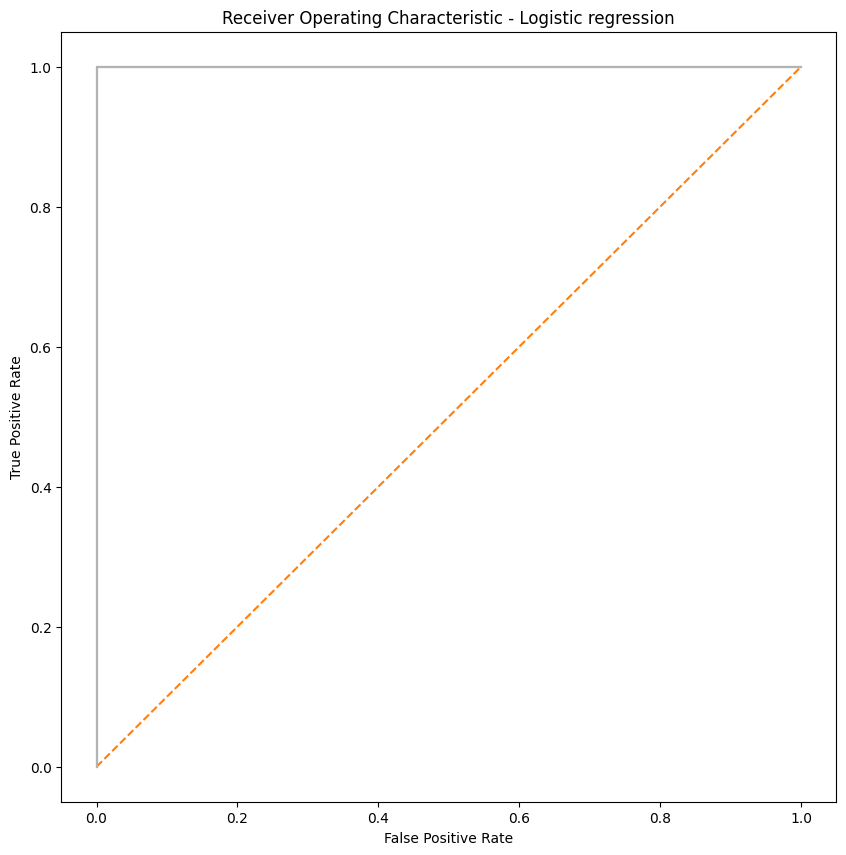

In [238]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [239]:
#for test
df_test_optimal_l1 = []
def divide_dataframe(df, n):
    num_rows = math.floor(len(df) / n)
    parts = [df.iloc[i*num_rows:(i+1)*num_rows].reset_index(drop=True) for i in range(n)]
    concatenated_df = pd.concat(parts, axis=1)
    return concatenated_df

for l in range(4,5):
    generated_columns = []
    for i in range(1,l+1):
        for j in range(1,temp_x+1):
            s1 = "mean"+str(j)+"_"+str(i)
            s2 = "median"+str(j)+"_"+str(i)
            s3 = "stdeviation"+str(j)+"_"+str(i)
            generated_columns.append(s1)
            generated_columns.append(s2)
            generated_columns.append(s3)
    generated_columns.append("activities")      
    for activity in activities:
        path = r'../data/AReM/'
        path = path + activity
        files = Path(path).glob('*.csv') 
        for file in files:
            data = []
            s = str(file)
            df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
            if activity == 'bending1' or activity == 'bending2':
                if 'dataset1.csv' in s or 'dataset2.csv' in s:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            else:
                if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                     for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
                        
            if len(data)!=0:
                data = pd.DataFrame(data)
                res = divide_dataframe(data,l)
                cols = [x for x in range(0,res.shape[1])]
                res.columns = cols
                row = []
                for col in range(0,res.shape[1]):
                    row.append(res[col].mean())
                    row.append(res[col].median())
                    row.append(res[col].std())
                row.append(activity)
                df_test_optimal_l1.append(row)
    df_test_optimal_l1 = pd.DataFrame(df_test_optimal_l1)
    df_test_optimal_l1.columns = generated_columns


In [240]:
df_test_optimal_l1

mean1_1  median1_1  stdeviation1_1   mean2_1  median2_1  stdeviation2_1  \
0   41.285500     41.750        0.921003  0.320917      0.430        0.281189   
1   43.149917     43.330        0.526099  0.524500      0.500        0.159336   
2   21.956833     22.710        3.198260  1.018417      0.710        1.210965   
3   28.656833     29.250        1.296033  0.176000      0.000        0.234149   
4   36.923500     35.875        3.604790  2.296000      1.920        1.430502   
5   37.458250     36.750        2.890591  2.144250      1.985        1.393121   
6   37.871500     36.670        3.314150  1.970250      1.300        2.034979   
7   28.015333     28.585        1.199290  0.239083      0.000        0.348343   
8   32.720000     29.500        7.034145  0.385583      0.000        0.602759   
9   48.000000     48.000        0.000000  0.000000      0.000        0.000000   
10  41.977917     42.000        0.433704  0.225833      0.000        0.281191   
11  46.242917     45.330        1.804747  0.248083      0.000        0.586176   
12  45.753250     45.750        0.553153  0.428167      0.470        0.244575   
13  46.173583     46.500        0.675804  0.432000      0.500        0.248754   
14  42.817167     43.000        1.160369  0.544083      0.500        0.278319   
15  44.531917     45.000        1.549439  0.400083      0.430        0.312312   
16  34.581250     35.875        4.819791  3.996083      3.655        2.332833   
17  34.006667     34.670        4.703726  4.638000      4.070        2.636366   
18  33.440333     33.875        4.757226  4.653333      4.305        2.427161   

      mean3_1  median3_1  stdeviation3_1   mean4_1  ...   mean4_4  median4_4  \
0   17.563917     18.000        3.756647  0.671250  ...  0.952917      0.500   
1   19.795667     20.500        3.634096  1.000583  ...  1.098667      0.820   
2   19.394250     20.500        3.901235  0.683833  ...  0.683333      0.470   
3   19.980917     20.875        2.860646  0.709833  ...  1.223000      0.830   
4   16.953500     17.415        3.003878  3.209083  ...  2.495500      2.170   
5   15.896500     16.000        2.907617  3.263167  ...  2.894417      2.650   
6   16.388917     17.000        4.213029  2.872833  ...  3.023833      2.870   
7    6.633417      7.000        1.914155  0.988667  ...  0.850000      0.765   
8    6.986333      6.670        2.884143  1.116583  ...  0.301500      0.430   
9    5.696250      6.000        1.500287  0.277917  ...  0.410500      0.430   
10  15.765417     15.750        2.913663  0.712417  ...  0.981333      0.710   
11  12.947500     11.000        7.187063  0.915000  ...  0.917917      0.710   
12  13.750500     13.750        4.122927  1.179583  ...  0.942833      0.830   
13  11.921917     12.000        3.221156  0.997417  ...  0.543083      0.470   
14  14.664500     15.000        1.980726  0.517333  ...  0.584417      0.470   
15  13.504750     15.000        3.846713  0.671250  ...  0.566833      0.430   
16  15.913083     16.000        2.968023  3.101917  ...  3.328167      2.960   
17  15.842083     16.000        2.919587  3.272333  ...  3.571417      3.520   
18  15.721500     15.750        2.995550  2.996667  ...  3.137083      3.000   

    stdeviation4_4    mean5_4  median5_4  stdeviation5_4   mean6_4  median6_4  \
0         0.978051  31.928333     31.290        2.312137  0.426583      0.430   
1         1.219666  31.695917     31.710        1.685306  0.332417      0.430   
2         0.942294  19.987167     20.500        2.302263  0.843667      0.810   
3         1.180944  17.472833     16.250        7.798744  1.832000      1.410   
4         1.480549  19.834500     20.375        2.490875  2.740583      2.355   
5         1.485792  19.998833     20.500        2.427409  2.680333      2.170   
6         1.802729  15.401083     15.500        3.399062  3.628667      3.445   
7         0.915284   8.169167      9.585        4.784830  0.797750      0.785   
8         0.258082   1.839583      1.750        0.85296

In [289]:
df_test_specified_features_l1 = pd.DataFrame()
col_names = df_test_optimal_l1.columns
for x in best_features_l1:
    df_test_specified_features_l1[x] = df_test_optimal_l1[x]
df_test_specified_features_l1['activities'] = df_test_optimal_l1['activities']
df_test_specified_features_l1

median1_1  stdeviation2_1  median3_1  stdeviation3_1    mean5_1  \
0      41.750        0.281189     18.000        3.756647  33.748250   
1      43.330        0.159336     20.500        3.634096  33.267417   
2      22.710        1.210965     20.500        3.901235  26.132583   
3      29.250        0.234149     20.875        2.860646  16.780000   
4      35.875        1.430502     17.415        3.003878  19.254500   
5      36.750        1.393121     16.000        2.907617  18.465667   
6      36.670        2.034979     17.000        4.213029  19.969500   
7      28.585        0.348343      7.000        1.914155   9.172167   
8      29.500        0.602759      6.670        2.884143   8.942000   
9      48.000        0.000000      6.000        1.500287   3.316583   
10     42.000        0.281191     15.750        2.913663  10.002000   
11     45.330        0.586176     11.000        7.187063  16.812583   
12     45.750        0.244575     13.750        4.122927  18.566500   
13     46.500        0.248754     12.000        3.221156  17.946000   
14     43.000        0.278319     15.000        1.980726  14.721667   
15     45.000        0.312312     15.000        3.846713  16.396667   
16     35.875        2.332833     16.000        2.968023  16.379000   
17     34.670        2.636366     16.000        2.919587  16.264667   
18     33.875        2.427161     15.750        2.995550  16.247833   

    median1_3  stdeviation5_3    mean5_4  stdeviation6_4 activities  
0      39.000        1.076232  31.928333        0.481900   bending1  
1      42.000        2.626048  31.695917        0.383195   bending1  
2      23.500        2.367112  19.987167        0.722291   bending2  
3      27.000        5.055463  17.472833        1.380832   bending2  
4      36.375        2.911893  19.834500        1.909818    cycling  
5      36.625        2.834617  19.998833        1.731649    cycling  
6      36.000        3.351091  15.401083        1.853758    cycling  
7      27.000        2.669549   8.169167        0.589433      lying  
8      48.000        1.489805   1.839583        0.400511      lying  
9      48.000        0.728640  10.573250        0.326034      lying  
10     43.500        2.633691  15.760583        1.270189    sitting  
11     46.500        2.289447  17.235750        1.305808    sitting  
12     45.000        2.024905  19.120250        0.675672    sitting  
13     42.000        4.270495  10.712417        0.545058   standing  
14     43.900        4.156718  15.957083        0.443488   standing  
15     45.000        5.918701  14.885917        0.706545   standing  
16     35.250        2.929360  16.483750        1.771999    walking  
17     34.000        3.366346  16.612750        1.818035    walking  
18     36.500        3.236520  16.413750        1.693845    walking

In [290]:
df_test_binary_l1 = df_test_specified_features_l1.copy()
df_test_binary_l1.loc[df_test_binary_l1['activities'].str.contains('bending', case=False),'activities'] = 1
df_test_binary_l1['activities']=df_test_binary_l1['activities'].apply(lambda k: k if np.isreal(k) else 0)
X_test = df_test_binary_l1[df_test_binary_l1.columns[:-1]]
y_test = df_test_binary_l1[['activities']]

In [291]:
X_test_scaled = scaler.fit_transform(X_test)

X_test_scaled_b = sm.add_constant(X_test_scaled)
lm = sm.Logit(y_test, X_test_scaled_b).fit_regularized(method = 'l1', alpha = 1/2.782559 , maxiter=15)
print(lm.summary())


lm_f = LogisticRegression(C = 2.782559, tol=1e-6, max_iter=500).fit(X_test_scaled, y_test)
y_test_pred_prob_l1 = list(lm_f.predict_proba(X_test_scaled)[:, 1])
y_test_pred_l1 = list(map(lambda x: int(x > 0.5), y_test_pred_prob_l1))


cm = confusion_matrix(y_test, y_test_pred_l1) 
print("Confusion Matrix:\n", cm)

print('AUC curve', roc_auc_score(y_test, y_test_pred_prob_l1))
print('Score for train',accuracy_score(y_train, y_train_pred_l1));
print('Score for test',accuracy_score(y_test, y_test_pred_l1))

Iteration limit reached    (Exit mode 9)
            Current function value: 0.1984626468818783
            Iterations: 15
            Function evaluations: 15
            Gradient evaluations: 15
                           Logit Regression Results                           
Dep. Variable:             activities   No. Observations:                   19
Model:                          Logit   Df Residuals:                        9
Method:                           MLE   Df Model:                            9
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.8786
Time:                        18:20:36   Log-Likelihood:                -1.1876
converged:                      False   LL-Null:                       -9.7784
Covariance Type:            nonrobust   LLR p-value:                   0.04595
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 4 out of 10 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A col

ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to mplement?

Both are easy to perform.

For Both Logistic Regression without L1 penalty and with L1 penalty p-values are very high suggesting that the features are not statistically significant.

## (c) Multi-class Classification (The Realistic Case)

i. Find the best l in the same way as you found it in 2(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set.Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [282]:
activities = ['bending1','bending2','cycling','lying','sitting','standing','walking']
best_l_l1_multi = 0
best_accuracy_l1_multi = -1
c_l1_multi = []
p_l1_multi = 0
l_value_l1_multi = []
p_value_l1_multi = []
features_l1_multi = []
cv_mean_score_l1_multi = []
best_df_l1_multi = []
best_features_l1_multi = []


def apply_logistic_regression(l,df,best_accuracy_l1_multi,best_l_l1_multi,p_l1_multi,best_features_l1_multi,best_df_l1_multi):
    df_final_train_binary = df.copy()
    X = df_final_train_binary[df_final_train_binary.columns[:-1]]
    y = df_final_train_binary['activities']
    X_scaled = scaler.fit_transform(X)
    lm = LogisticRegressionCV(Cs = 10, cv = StratifiedKFold(5), penalty = "l1", solver = "saga",multi_class='multinomial',
                            tol = 0.001, max_iter = 500, intercept_scaling = 10000.0)
    lm.fit(X_scaled, y)
    l_value_l1_multi.append(l)
    c_l1_multi.append(lm.C_[0])
    p_value_l1_multi.append(np.count_nonzero(lm.coef_[0]))
    feature_ind = [i for i, e in enumerate(lm.coef_[0]) if e != 0]
    features_l1_multi.append([list(X.columns)[feat] for feat in feature_ind])
    classes_le = len(np.unique(y))
    Cs_index = list(lm.Cs_)
#     scores = lm.scores_
#     scores = [*scores.values()]
#     scores_val= []
#     for i in scores:
#         scores_val.append(np.mean(i.flatten()))
#     mean_score = np.mean(scores_val)
    cv_scores = cross_val_score(lm,X_scaled,y,cv = StratifiedKFold(5),scoring='accuracy')
    cv_mean_score_l1_multi.append(np.mean(cv_scores))
    mean_score = np.mean(cv_scores)
    accuracy = mean_score
    if best_accuracy_l1_multi < accuracy:
        best_accuracy_l1_multi = accuracy
        best_features_l1_multi = [list(X.columns)[feat] for feat in feature_ind]
        best_df_l1_multi = df
        p_l1_multi = np.count_nonzero(lm.coef_[0])
        best_l_l1_multi = l
    return best_accuracy_l1_multi,best_l_l1_multi,p_l1_multi,best_features_l1_multi,best_df_l1_multi


def divide_dataframe(df, n):
    num_rows = math.floor(len(df) / n)
    parts = [df.iloc[i*num_rows:(i+1)*num_rows].reset_index(drop=True) for i in range(n)]
    concatenated_df = pd.concat(parts, axis=1)
    return concatenated_df

for l in range(1,21):
    final_data_l1_multi = []
    generated_columns = []
    for i in range(1,l+1):
        for j in range(1,temp_x+1):
            s1 = "mean"+str(j)+"_"+str(i)
            s2 = "median"+str(j)+"_"+str(i)
            s3 = "stdeviation"+str(j)+"_"+str(i)
            generated_columns.append(s1)
            generated_columns.append(s2)
            generated_columns.append(s3)
    generated_columns.append("activities")      
    for activity in activities:
        path = r'../data/AReM/'
        path = path + activity
        files = Path(path).glob('*.csv') 
        for file in files:
            data = []
            s = str(file)
            df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
            if activity == 'bending1' or activity == 'bending2':
                if 'dataset1.csv' in s or 'dataset2.csv' in s:
                    pass
                else:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            else:
                if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                    pass
                else:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            if len(data)!=0:
                data = pd.DataFrame(data)
                res = divide_dataframe(data,l)
                cols = [x for x in range(0,res.shape[1])]
                res.columns = cols
                row = []
                for col in range(0,res.shape[1]):
                    row.append(res[col].mean())
                    row.append(res[col].median())
                    row.append(res[col].std())
                if(activity == 'bending1' or activity=='bending2'):
                    row.append('bending')
                else:
                    row.append(activity)
                final_data_l1_multi.append(row)
    final_data_l1_multi = pd.DataFrame(final_data_l1_multi)
    final_data_l1_multi.columns = generated_columns
    best_accuracy_l1_multi,best_l_l1_multi,p_l1_multi,best_features_l1_multi,best_df_l1_multi = apply_logistic_regression(l,final_data_l1_multi,best_accuracy_l1_multi,best_l_l1_multi,p_l1_multi,best_features_l1_multi,best_df_l1_multi)

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

In [283]:
df_values_l1_multi = pd.DataFrame(l_value_l1_multi)
df_values_l1_multi.insert(1,'p_value',p_value_l1_multi)
df_values_l1_multi.insert(2,'C',c_l1_multi)
df_values_l1_multi.insert(3,'cv_mean_score',cv_mean_score_l1_multi)
df_values_l1_multi.columns = ['l_value','p_value','C','cv_mean_score']
df_values_l1_multi

l_value  p_value          C  cv_mean_score
0         1        5   2.782559       0.897802
1         2        4   0.359381       0.827473
2         3       10   2.782559       0.869231
3         4       14   2.782559       0.827473
4         5       22   2.782559       0.841758
5         6       15   2.782559       0.827473
6         7       30   2.782559       0.840659
7         8       10   0.359381       0.826374
8         9       23   2.782559       0.826374
9        10        7   0.359381       0.826374
10       11        6   0.359381       0.768132
11       12        7   0.359381       0.812088
12       13      156  21.544347       0.798901
13       14       33   2.782559       0.827473
14       15        8   0.359381       0.796703
15       16        8   0.359381       0.752747
16       17        8   0.359381       0.753846
17       18        7   0.359381       0.797802
18       19       10   0.359381       0.839560
19       20      227  21.544347       0.840659

In [284]:
print(f"The best (l,p) obtained is : {best_l_l1_multi,p_l1_multi}")

The best (l,p) obtained is : (1, 5)


In [285]:
df = pd.DataFrame()
col_names = best_df_l1_multi.columns
for x in best_features_l1_multi:
    df[x] = best_df_l1_multi[x]
df['activities'] = best_df_l1_multi['activities']
df

mean1_1  median3_1  stdeviation3_1    mean5_1  stdeviation5_1 activities
0   43.954500     23.000        3.030943  35.588458        1.999604    bending
1   42.179812     23.000        3.810469  33.493917        3.849448    bending
2   41.678063     19.125        4.087107  29.857083        2.411026    bending
3   43.454958     15.000        3.847638  23.034792        2.488862    bending
4   43.969125     16.250        3.742420  22.103750        3.318301    bending
..        ...        ...             ...        ...             ...        ...
64  34.763333     15.330        2.920829  16.299563        3.174681    walking
65  34.935812     15.500        2.900248  15.997229        3.192058    walking
66  34.333042     15.500        2.967741  15.864437        3.000493    walking
67  34.599875     15.000        3.036746  16.055563        2.905688    walking
68  34.225875     15.500        2.812274  16.148000        2.992920    walking

[69 rows x 6 columns]

In [298]:
df_l1_multi = df.copy()
X_train = df_l1_multi[df_l1_multi.columns[:-1]]
y_train = df_l1_multi[['activities']]

X_train_scaled = scaler.fit_transform(X_train)


lm = LogisticRegression(C = 2.782559, penalty = "l1", solver = "saga", multi_class = "multinomial", 
                                       tol = 0.001, max_iter = 500, intercept_scaling = 10000.0)
    
lm.fit(X_train_scaled, y_train)

y_train_pred = lm.predict(X_train_scaled)

mis_error = 1 - accuracy_score(y_train, y_train_pred)
print("Train misclassification Error(1- Accuracy) for multinomial logistic regression: ", mis_error)
    
cm = confusion_matrix(y_train, y_train_pred) 
print("\nConfusion Matrix:\n", cm)

Train misclassification Error(1- Accuracy) for multinomial logistic regression:  0.07246376811594202

Confusion Matrix:
 [[ 5  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 10  0  0  0  2]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 11  1  0]
 [ 0  0  0  0  2 10  0]
 [ 0  0  0  0  0  0 12]]


C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [300]:
df_test_optimal_l1_multi = []
def divide_dataframe(df, n):
    num_rows = math.floor(len(df) / n)
    parts = [df.iloc[i*num_rows:(i+1)*num_rows].reset_index(drop=True) for i in range(n)]
    concatenated_df = pd.concat(parts, axis=1)
    return concatenated_df

for l in range(1,2):
    generated_columns = []
    for i in range(1,l+1):
        for j in range(1,temp_x+1):
            s1 = "mean"+str(j)+"_"+str(i)
            s2 = "median"+str(j)+"_"+str(i)
            s3 = "stdeviation"+str(j)+"_"+str(i)
            generated_columns.append(s1)
            generated_columns.append(s2)
            generated_columns.append(s3)
    generated_columns.append("activities")      
    for activity in activities:
        path = r'../data/AReM/'
        path = path + activity
        files = Path(path).glob('*.csv') 
        for file in files:
            data = []
            s = str(file)
            df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
            if activity == 'bending1' or activity == 'bending2':
                if 'dataset1.csv' in s or 'dataset2.csv' in s:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            else:
                if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                     for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
                        
            if len(data)!=0:
                data = pd.DataFrame(data)
                res = divide_dataframe(data,l)
                cols = [x for x in range(0,res.shape[1])]
                res.columns = cols
                row = []
                for col in range(0,res.shape[1]):
                    row.append(res[col].mean())
                    row.append(res[col].median())
                    row.append(res[col].std())
                row.append(activity)
                df_test_optimal_l1_multi.append(row)
    df_test_optimal_l1_multi = pd.DataFrame(df_test_optimal_l1_multi)
    df_test_optimal_l1_multi.columns = generated_columns

In [301]:
df_test_optimal_l1_multi

mean1_1  median1_1  stdeviation1_1   mean2_1  median2_1  stdeviation2_1  \
0   40.624792     40.500        1.476967  0.358604      0.430        0.322605   
1   42.812812     42.500        1.435550  0.372437      0.470        0.289158   
2   24.562958     24.250        3.737514  0.590833      0.430        0.837408   
3   27.464604     28.000        3.583582  0.449708      0.430        0.767197   
4   37.177042     36.250        3.581301  2.374208      1.920        1.601799   
5   37.561187     36.875        3.226507  2.080687      1.700        1.639258   
6   37.058708     36.000        3.710180  2.438146      1.920        1.996887   
7   27.716375     27.500        1.442253  0.363687      0.430        0.394817   
8   44.182937     48.000        7.495615  0.101875      0.000        0.346756   
9   48.004167     48.000        0.032038  0.007167      0.000        0.055106   
10  42.363563     43.000        2.068247  0.492563      0.500        0.403581   
11  45.917667     45.635        1.089027  0.324542      0.430        0.365820   
12  45.239667     45.000        0.429915  0.172958      0.000        0.251176   
13  44.334729     45.000        2.476940  0.432958      0.470        0.370591   
14  43.174938     43.670        1.989052  0.506583      0.500        0.307413   
15  42.760562     44.500        3.398919  0.486167      0.470        0.446511   
16  34.227771     35.500        4.889576  3.995729      3.630        2.271102   
17  33.509729     34.125        4.850923  4.450771      4.085        2.338685   
18  34.660583     35.000        5.315110  4.200896      3.900        2.480206   

      mean3_1  median3_1  stdeviation3_1   mean4_1  median4_1  stdeviation4_1  \
0   19.040937     19.250        4.462952  0.832542      0.500        0.965659   
1   20.096979     21.000        3.893737  0.876438      0.500        1.047259   
2   19.121333     20.250        4.299612  0.736771      0.470        0.927048   
3   20.842542     20.750        3.826268  0.779917      0.500        0.904436   
4   16.531083     16.670        3.430906  2.910604      2.620        1.600137   
5   16.567042     17.000        3.691401  3.033875      2.950        1.625415   
6   16.388313     16.500        3.537950  2.980688      2.860        1.612059   
7    6.078563      6.250        3.468994  0.871021      0.820        0.777400   
8    6.679958      6.250        1.936492  0.584104      0.430        0.749945   
9    4.900563      5.500        2.566429  0.397312      0.430        0.447127   
10  17.119292     18.000        3.141010  0.641854      0.450        0.760958   
11  16.871542     18.750        5.359859  0.696375      0.470        0.857231   
12  12.813312     13.000        4.191913  1.108687      0.830        1.015271   
13  11.646146     12.250        3.698519  0.843062      0.500        0.888806   
14  12.771333     13.000        3.289489  0.686687      0.485        0.765337   
15  15.036833     15.250        3.121792  0.588875      0.430        0.700999   
16  15.713083     15.750        2.839695  3.303812      3.200        1.667285   
17  15.557771     15.635        2.912404  3.350854      3.110        1.664378   
18  15.223187     15.250        3.101017  3.111312      2.870        1.688745   

      mean5_1  median5_1  stdeviation5_1   mean6_1  median6_1  stdeviation6_1  \
0   34.311292     35.000        2.188449  0.570583      0.430        0.582915   
1   33.024583     33.000        1.995255  0.571083      0.430        0.601010   
2   23.493042     23.750        3.693786  0.700188      0.500        0.693720   
3   17.617938     18.000        5.053642  1.122125      0.830        1.012342   
4   19.607250     20.000        2.890347  2.921729      2.500        1.852600   
5   19.518896     20.000        2.727377  2.765896      2.450        1.769203   
6   18.125958     18.875        3.537144  2.983750      2.570        1.815730   
7    8.337437      8.750        4.074511  0.734271      0.710        0.613688   
8    4.376292      3.330        3.2

In [302]:
df_test_specified_features_l1_multi = pd.DataFrame()
col_names = df_test_specified_features_l1_multi.columns
for x in best_features_l1_multi:
    df_test_specified_features_l1_multi[x] = df_test_optimal_l1_multi[x]
df_test_specified_features_l1_multi['activities'] = df_test_optimal_l1_multi['activities']
df_test_specified_features_l1_multi

mean1_1  median3_1  stdeviation3_1    mean5_1  stdeviation5_1 activities
0   40.624792     19.250        4.462952  34.311292        2.188449   bending1
1   42.812812     21.000        3.893737  33.024583        1.995255   bending1
2   24.562958     20.250        4.299612  23.493042        3.693786   bending2
3   27.464604     20.750        3.826268  17.617938        5.053642   bending2
4   37.177042     16.670        3.430906  19.607250        2.890347    cycling
5   37.561187     17.000        3.691401  19.518896        2.727377    cycling
6   37.058708     16.500        3.537950  18.125958        3.537144    cycling
7   27.716375      6.250        3.468994   8.337437        4.074511      lying
8   44.182937      6.250        1.936492   4.376292        3.274539      lying
9   48.004167      5.500        2.566429   7.624896        3.268502      lying
10  42.363563     18.000        3.141010  13.381771        4.956821    sitting
11  45.917667     18.750        5.359859  18.442792        3.585511    sitting
12  45.239667     13.000        4.191913  19.330667        2.945840    sitting
13  44.334729     12.250        3.698519  13.443708        5.401794   standing
14  43.174938     13.000        3.289489  14.285500        2.983976   standing
15  42.760562     15.250        3.121792  15.550812        4.296574   standing
16  34.227771     15.750        2.839695  16.621167        3.092094    walking
17  33.509729     15.635        2.912404  16.541375        3.133564    walking
18  34.660583     15.250        3.101017  16.251042        3.155015    walking

In [303]:
df_test_l1_multi = df_test_specified_features_l1_multi.copy()
X_test = df_test_l1_multi[df_test_l1_multi.columns[:-1]]
y_test = df_test_l1_multi[['activities']]

In [304]:
X_test_scaled = scaler.fit_transform(X_test)


lm = LogisticRegression(C = 2.782559, penalty = "l1", solver = "saga", multi_class = "multinomial", 
                                       tol = 0.001, max_iter = 500, intercept_scaling = 10000.0)
    
lm.fit(X_test_scaled, y_test)

y_test_pred = lm.predict(X_test_scaled)

mis_error = 1 - accuracy_score(y_test, y_test_pred)
print("Test misclassification Error(1- Accuracy) for multinomial logistic regression: ", mis_error)
    
cm = confusion_matrix(y_test, y_test_pred) 
print("\nConfusion Matrix:\n", cm)

Test misclassification Error(1- Accuracy) for multinomial logistic regression:  0.0

Confusion Matrix:
 [[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]


C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ii. Repeat 2(c)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi-nomial priors and compare the results.

Gaussian

In [314]:
activities = ['bending1','bending2','cycling','lying','sitting','standing','walking']
best_l_l1_multi_gau = 0
best_accuracy_l1_multi_gau = -1
c_l1_multi_gau = []
p_l1_multi_gau = 0
l_value_l1_multi_gau = []
features_l1_multi_gau = []
cv_mean_score_l1_multi_gau = []
best_df_l1_multi_gau = []
best_features_l1_multi_gau = []


def apply_logistic_regression(l,df,best_accuracy_l1_multi_gau,best_l_l1_multi_gau,p_l1_multi_gau,best_features_l1_multi_gau,best_df_l1_multi_gau):
    df_final_train_binary = df.copy()
    X = df_final_train_binary[df_final_train_binary.columns[:-1]]
    y = df_final_train_binary['activities']
    Gm = GaussianNB()
    Gm.fit(X, y)
    scores = cross_val_score(Gm, X, y, cv = StratifiedKFold(5), scoring='accuracy')
    cv_mean_score_l1_multi_gau.append(scores.mean())
    l_value_l1_multi_gau.append(l)
    accuracy = scores.mean()
    if best_accuracy_l1_multi_gau < accuracy:
        best_accuracy_l1_multi_gau = accuracy
        best_l_l1_multi_gau = l
        best_df_l1_multi_gau = df
    return best_accuracy_l1_multi_gau,best_l_l1_multi_gau,p_l1_multi_gau,best_features_l1_multi_gau,best_df_l1_multi_gau


def divide_dataframe(df, n):
    num_rows = math.floor(len(df) / n)
    parts = [df.iloc[i*num_rows:(i+1)*num_rows].reset_index(drop=True) for i in range(n)]
    concatenated_df = pd.concat(parts, axis=1)
    return concatenated_df

for l in range(1,21):
    final_data_l1_multi_gau = []
    generated_columns = []
    for i in range(1,l+1):
        for j in range(1,temp_x+1):
            s1 = "mean"+str(j)+"_"+str(i)
            s2 = "median"+str(j)+"_"+str(i)
            s3 = "stdeviation"+str(j)+"_"+str(i)
            generated_columns.append(s1)
            generated_columns.append(s2)
            generated_columns.append(s3)
    generated_columns.append("activities")      
    for activity in activities:
        path = r'../data/AReM/'
        path = path + activity
        files = Path(path).glob('*.csv') 
        for file in files:
            data = []
            s = str(file)
            df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
            if activity == 'bending1' or activity == 'bending2':
                if 'dataset1.csv' in s or 'dataset2.csv' in s:
                    pass
                else:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            else:
                if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                    pass
                else:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            if len(data)!=0:
                data = pd.DataFrame(data)
                res = divide_dataframe(data,l)
                cols = [x for x in range(0,res.shape[1])]
                res.columns = cols
                row = []
                for col in range(0,res.shape[1]):
                    row.append(res[col].mean())
                    row.append(res[col].median())
                    row.append(res[col].std())
                if(activity == 'bending1' or activity=='bending2'):
                    row.append('bending')
                else:
                    row.append(activity)
                final_data_l1_multi_gau.append(row)
    final_data_l1_multi_gau = pd.DataFrame(final_data_l1_multi_gau)
    final_data_l1_multi_gau.columns = generated_columns
    best_accuracy_l1_multi_gau,best_l_l1_multi_gau,p_l1_multi_gau,best_features_l1_multi_gau,best_df_l1_multi_gau = apply_logistic_regression(l,final_data_l1_multi_gau,best_accuracy_l1_multi_gau,best_l_l1_multi_gau,p_l1_multi_gau,best_features_l1_multi_gau,best_df_l1_multi_gau)

In [315]:
df_values_l1_multi_gau = pd.DataFrame(l_value_l1_multi_gau)
df_values_l1_multi_gau.insert(1,'cv_mean_score',cv_mean_score_l1_multi_gau)
df_values_l1_multi_gau.columns = ['l_value','cv_mean_score']
df_values_l1_multi_gau

l_value  cv_mean_score
0         1       0.825275
1         2       0.827473
2         3       0.768132
3         4       0.796703
4         5       0.826374
5         6       0.796703
6         7       0.783516
7         8       0.796703
8         9       0.797802
9        10       0.854945
10       11       0.782418
11       12       0.796703
12       13       0.768132
13       14       0.782418
14       15       0.781319
15       16       0.752747
16       17       0.826374
17       18       0.752747
18       19       0.709890
19       20       0.781319

In [320]:
print(f"The best (l) obtained is : {best_l_l1_multi_gau}")

The best (l) obtained is : 10


In [318]:
best_df_l1_multi_gau

mean1_1  median1_1  stdeviation1_1   mean2_1  median2_1  stdeviation2_1  \
0   44.025833     44.500        1.281888  0.371875      0.470        0.304293   
1   44.220417     45.125        3.291462  0.608333      0.485        0.634338   
2   41.670417     42.000        2.113836  0.487500      0.500        0.371681   
3   44.857500     45.000        0.877049  0.165208      0.000        0.305287   
4   43.033750     43.165        1.021629  0.483958      0.500        0.274472   
..        ...        ...             ...       ...        ...             ...   
64  35.896042     36.335        4.306677  3.752708      3.835        2.044088   
65  34.398542     35.250        4.555171  4.289583      3.855        2.235798   
66  33.775625     34.125        5.440626  4.323125      4.165        2.615006   
67  36.303958     37.125        4.751155  4.337917      4.045        2.762238   
68  34.465208     34.875        4.764014  4.356250      3.755        2.671882   

      mean3_1  median3_1  stdeviation3_1   mean4_1  ...  mean4_10  median4_10  \
0   23.034792     24.000        2.127034  0.392083  ...  0.288750       0.430   
1   24.647083     24.250        2.360059  0.659167  ...  1.226667       0.825   
2   19.979583     22.500        6.350834  1.069375  ...  0.583125       0.500   
3   17.811250     18.750        3.548898  1.025833  ...  0.687083       0.500   
4   15.552917     15.000        2.629392  0.920000  ...  0.785208       0.450   
..        ...        ...             ...       ...  ...       ...         ...   
64  15.053958     15.125        3.244124  3.312500  ...  3.350000       3.530   
65  15.628542     16.290        2.982196  3.020208  ...  2.902083       2.830   
66  15.333750     15.250        2.497409  3.174375  ...  3.021042       2.760   
67  14.532917     14.710        3.076491  2.946042  ...  3.234583       3.070   
68  15.585000     15.710        2.730678  2.943125  ...  3.314583       2.930   

    stdeviation4_10   mean5_10  median5_10  stdeviation5_10  mean6_10  \
0          0.333611  36.031042      36.000         0.187676  0.129792   
1          1.297547  28.692708      30.000         3.440678  0.529583   
2          0.477485  27.114583      26.750         1.095713  0.329167   
3          0.607720  21.495833      22.250         3.580606  0.663333   
4          0.911296  22.840208      22.750         0.953537  0.617083   
..              ...        ...         ...              ...       ...   
64         1.611685  16.262500      15.750         3.551073  3.452292   
65         1.326836  15.826667      15.710         2.904782  3.064375   
66         1.778679  16.619167      16.875         3.427742  3.403125   
67         1.642185  15.993125      16.165         2.663584  3.333542   
68         1.852616  16.402083      16.375         3.388187  3.604375   

    median6_10  stdeviation6_10  activities  
0        0.000         0.271932     bending  
1        0.430         0.505038     bending  
2        0.430         0.281401     bending  
3        0.485         0.819227     bending  
4        0.500         0.390215     bending  
..         ...              ...         ...  
64       3.560         1.582925     walking  
65       3.065         1.477336     walking  
66       3.135         1.761360     walking  
67       3.155         1.635244     walking  
68       3.595         1.565439     walking  

[69 rows x 181 columns]

In [319]:
X_train = best_df_l1_multi_gau[best_df_l1_multi_gau.columns[:-1]]
y_train = best_df_l1_multi_gau[['activities']]

Gm = GaussianNB()
    
Gm.fit(X_train, y_train)

y_train_pred = Gm.predict(X_train)

mis_error = 1 - accuracy_score(y_train, y_train_pred)
print("Train misclassification Error(1- Accuracy) for multinomial logistic regression: ", mis_error)
    
cm = confusion_matrix(y_train, y_train_pred) 
print("\nConfusion Matrix:\n", cm)

Train misclassification Error(1- Accuracy) for multinomial logistic regression:  0.01449275362318836

Confusion Matrix:
 [[ 8  0  1  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [321]:
df_test_optimal_l1_multi_gau = []
def divide_dataframe(df, n):
    num_rows = math.floor(len(df) / n)
    parts = [df.iloc[i*num_rows:(i+1)*num_rows].reset_index(drop=True) for i in range(n)]
    concatenated_df = pd.concat(parts, axis=1)
    return concatenated_df

for l in range(10,11):
    generated_columns = []
    for i in range(1,l+1):
        for j in range(1,temp_x+1):
            s1 = "mean"+str(j)+"_"+str(i)
            s2 = "median"+str(j)+"_"+str(i)
            s3 = "stdeviation"+str(j)+"_"+str(i)
            generated_columns.append(s1)
            generated_columns.append(s2)
            generated_columns.append(s3)
    generated_columns.append("activities")      
    for activity in activities:
        path = r'../data/AReM/'
        path = path + activity
        files = Path(path).glob('*.csv') 
        for file in files:
            data = []
            s = str(file)
            df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
            if activity == 'bending1' or activity == 'bending2':
                if 'dataset1.csv' in s or 'dataset2.csv' in s:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            else:
                if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                     for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
                        
            if len(data)!=0:
                data = pd.DataFrame(data)
                res = divide_dataframe(data,l)
                cols = [x for x in range(0,res.shape[1])]
                res.columns = cols
                row = []
                for col in range(0,res.shape[1]):
                    row.append(res[col].mean())
                    row.append(res[col].median())
                    row.append(res[col].std())
                row.append(activity)
                df_test_optimal_l1_multi_gau.append(row)
    df_test_optimal_l1_multi_gau = pd.DataFrame(df_test_optimal_l1_multi_gau)
    df_test_optimal_l1_multi_gau.columns = generated_columns

In [322]:
df_test_optimal_l1_multi_gau

mean1_1  median1_1  stdeviation1_1   mean2_1  median2_1  stdeviation2_1  \
0   40.401250     40.500        0.868955  0.551458      0.500        0.182652   
1   43.425417     43.500        0.400696  0.551458      0.500        0.140667   
2   20.637083     21.125        2.696175  1.084792      0.830        1.041180   
3   27.796667     27.000        1.292899  0.094375      0.000        0.209984   
4   36.751667     35.625        3.974684  2.403542      2.225        1.475361   
5   37.256875     36.875        3.022221  2.145833      1.790        1.262085   
6   37.668542     36.670        3.172496  2.267917      1.540        2.426346   
7   28.979167     29.000        0.191809  0.102917      0.000        0.191344   
8   28.991042     29.000        0.375280  0.153958      0.000        0.220741   
9   48.000000     48.000        0.000000  0.000000      0.000        0.000000   
10  41.994792     42.000        0.062942  0.026875      0.000        0.105188   
11  47.744792     48.000        1.977232  0.340208      0.000        0.862459   
12  45.506875     45.500        0.432460  0.380833      0.430        0.232981   
13  46.562292     46.500        0.275204  0.461250      0.500        0.184444   
14  42.832917     43.415        1.741238  0.552083      0.500        0.327485   
15  43.521042     44.500        2.042920  0.504375      0.470        0.386148   
16  34.639583     36.000        4.836674  3.655000      3.555        2.300109   
17  34.220625     35.415        4.984472  4.504583      3.800        2.513002   
18  33.058750     33.750        4.455042  4.867083      4.975        2.311529   

      mean3_1  median3_1  stdeviation3_1   mean4_1  ...  mean4_10  median4_10  \
0   20.040000     20.290        3.250932  0.466250  ...  0.647292       0.500   
1   19.505208     20.250        4.535404  1.329375  ...  1.741458       1.455   
2   21.950625     21.750        1.989228  0.571458  ...  0.322083       0.430   
3   18.733542     18.835        3.896450  1.101667  ...  0.900833       0.710   
4   17.046042     17.500        3.537177  3.488958  ...  2.677083       2.465   
5   15.805208     15.330        3.158833  3.237083  ...  3.070000       2.950   
6   16.748333     17.875        4.497415  2.901875  ...  2.646250       2.110   
7    6.908750      7.225        1.475575  0.905208  ...  0.999375       0.940   
8    5.453125      6.000        1.623421  0.442083  ...  0.286250       0.430   
9    6.048750      6.000        0.700142  0.264583  ...  0.498750       0.470   
10  16.603125     16.750        1.420596  0.595208  ...  0.762500       0.485   
11  19.382917     21.000        4.833370  0.483542  ...  1.211875       0.905   
12  13.680000     13.710        3.317105  0.836875  ...  1.118125       0.940   
13  12.943125     12.000        2.348637  0.515417  ...  0.735625       0.470   
14  14.970417     15.250        2.370619  0.478125  ...  0.690000       0.470   
15  10.551875     11.125        4.577461  0.982500  ...  0.405000       0.430   
16  15.611250     16.000        2.978736  3.157292  ...  3.321250       2.730   
17  16.407917     16.710        3.031133  3.028750  ...  3.960417       3.835   
18  15.557292     15.500        2.764859  2.962500  ...  3.503542       3.415   

    stdeviation4_10   mean5_10  median5_10  stdeviation5_10  mean6_10  \
0          0.538172  31.676875      31.000         2.261801  0.407292   
1          1.503651  31.991458      32.000         0.979885  0.357708   
2          0.302774  20.938750      21.000         1.176657  0.601250   
3          1.043855  24.997917      25.750         4.976857  2.076875   
4          1.611015  19.862292      20.375         2.553277  2.728333   
5          1.606278  20.409583      21.000         2.201007  2.397083   
6          1.834364  15.450417      16.225         3.469723  3.922708   
7          0.754880  10.392500      10.375         1.638686  0.932500   
8          0.271800   1.805625       1.875         0.669325  0.444167   
9          0.334312  10.312500    

In [323]:
X_test = df_test_optimal_l1_multi_gau[df_test_optimal_l1_multi_gau.columns[:-1]]
y_test = df_test_optimal_l1_multi_gau[['activities']]

Gm = GaussianNB()
    
Gm.fit(X_test, y_test)

y_test_pred = Gm.predict(X_test)

mis_error = 1 - accuracy_score(y_test, y_test_pred)
print("Test misclassification Error(1- Accuracy) for multinomial logistic regression: ", mis_error)
    
cm = confusion_matrix(y_test, y_test_pred) 
print("\nConfusion Matrix:\n", cm)

Test misclassification Error(1- Accuracy) for multinomial logistic regression:  0.0

Confusion Matrix:
 [[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]


C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multinomial

In [325]:
activities = ['bending1','bending2','cycling','lying','sitting','standing','walking']
best_l_l1_multi_m = 0
best_accuracy_l1_multi_m = -1
p_l1_multi_m = 0
l_value_l1_multi_m = []
features_l1_multi_m = []
cv_mean_score_l1_multi_m = []
best_df_l1_multi_m = []
best_features_l1_multi_m = []


def apply_logistic_regression(l,df,best_accuracy_l1_multi_m,best_l_l1_multi_m,p_l1_multi_m,best_features_l1_multi_m,best_df_l1_multi_m):
    df_final_train_binary = df.copy()
    X = df_final_train_binary[df_final_train_binary.columns[:-1]]
    y = df_final_train_binary['activities']
    Mm = MultinomialNB()
    Mm.fit(X, y)
    scores = cross_val_score(Mm, X, y, cv = StratifiedKFold(5), scoring='accuracy')
    cv_mean_score_l1_multi_m.append(scores.mean())
    l_value_l1_multi_m.append(l)
    accuracy = scores.mean()
    if best_accuracy_l1_multi_m < accuracy:
        best_accuracy_l1_multi_m = accuracy
        best_l_l1_multi_m = l
        best_df_l1_multi_m = df
    return best_accuracy_l1_multi_m,best_l_l1_multi_m,p_l1_multi_m,best_features_l1_multi_m,best_df_l1_multi_m


def divide_dataframe(df, n):
    num_rows = math.floor(len(df) / n)
    parts = [df.iloc[i*num_rows:(i+1)*num_rows].reset_index(drop=True) for i in range(n)]
    concatenated_df = pd.concat(parts, axis=1)
    return concatenated_df

for l in range(1,21):
    final_data_l1_multi_m = []
    generated_columns = []
    for i in range(1,l+1):
        for j in range(1,temp_x+1):
            s1 = "mean"+str(j)+"_"+str(i)
            s2 = "median"+str(j)+"_"+str(i)
            s3 = "stdeviation"+str(j)+"_"+str(i)
            generated_columns.append(s1)
            generated_columns.append(s2)
            generated_columns.append(s3)
    generated_columns.append("activities")      
    for activity in activities:
        path = r'../data/AReM/'
        path = path + activity
        files = Path(path).glob('*.csv') 
        for file in files:
            data = []
            s = str(file)
            df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
            if activity == 'bending1' or activity == 'bending2':
                if 'dataset1.csv' in s or 'dataset2.csv' in s:
                    pass
                else:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            else:
                if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                    pass
                else:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            if len(data)!=0:
                data = pd.DataFrame(data)
                res = divide_dataframe(data,l)
                cols = [x for x in range(0,res.shape[1])]
                res.columns = cols
                row = []
                for col in range(0,res.shape[1]):
                    row.append(res[col].mean())
                    row.append(res[col].median())
                    row.append(res[col].std())
                if(activity == 'bending1' or activity=='bending2'):
                    row.append('bending')
                else:
                    row.append(activity)
                final_data_l1_multi_m.append(row)
    final_data_l1_multi_m = pd.DataFrame(final_data_l1_multi_m)
    final_data_l1_multi_m.columns = generated_columns
    best_accuracy_l1_multi_m,best_l_l1_multi_m,p_l1_multi_m,best_features_l1_multi_m,best_df_l1_multi_m = apply_logistic_regression(l,final_data_l1_multi_m,best_accuracy_l1_multi_m,best_l_l1_multi_m,p_l1_multi_m,best_features_l1_multi_m,best_df_l1_multi_m)

In [326]:
df_values_l1_multi_m = pd.DataFrame(l_value_l1_multi_m)
df_values_l1_multi_m.insert(1,'cv_mean_score',cv_mean_score_l1_multi_m)
df_values_l1_multi_m.columns = ['l_value','cv_mean_score']
df_values_l1_multi_m

l_value  cv_mean_score
0         1       0.796703
1         2       0.812088
2         3       0.782418
3         4       0.826374
4         5       0.826374
5         6       0.856044
6         7       0.826374
7         8       0.826374
8         9       0.840659
9        10       0.826374
10       11       0.840659
11       12       0.825275
12       13       0.826374
13       14       0.841758
14       15       0.840659
15       16       0.840659
16       17       0.825275
17       18       0.810989
18       19       0.839560
19       20       0.825275

In [327]:
print(f"The best (l) obtained is : {best_l_l1_multi_m}")

The best (l) obtained is : 6


In [328]:
best_df_l1_multi_m

mean1_1  median1_1  stdeviation1_1   mean2_1  median2_1  stdeviation2_1  \
0   44.231125     44.500        1.031429  0.402875      0.500        0.268555   
1   43.946750     45.000        3.229635  0.519625      0.470        0.594043   
2   41.715000     42.000        2.242549  0.492125      0.500        0.353699   
3   44.923875     45.000        0.682991  0.115250      0.000        0.256130   
4   42.738625     42.500        0.894612  0.406625      0.470        0.297751   
..        ...        ...             ...       ...        ...             ...   
64  35.478375     35.585        4.609448  4.001500      3.905        2.194613   
65  34.096000     34.625        4.236192  4.251125      3.855        2.203871   
66  33.678875     33.875        5.401085  4.306250      4.165        2.511427   
67  35.731375     36.625        4.691825  4.237125      4.045        2.460784   
68  34.348375     34.875        4.818321  4.378125      3.675        2.664497   

      mean3_1  median3_1  stdeviation3_1   mean4_1  ...   mean4_6  median4_6  \
0   22.988625     24.000        1.825713  0.414875  ...  0.322000      0.430   
1   23.029000     23.750        3.958475  0.743125  ...  1.310000      0.765   
2   19.741875     23.125        5.997765  1.064750  ...  0.634000      0.500   
3   17.761625     18.500        3.118332  1.041750  ...  0.707625      0.470   
4   16.204250     15.330        4.612760  1.055000  ...  0.788000      0.500   
..        ...        ...             ...       ...  ...       ...        ...   
64  14.985375     15.000        3.055000  3.310875  ...  3.329625      3.290   
65  15.432250     15.875        3.004996  3.144875  ...  2.914875      2.865   
66  15.414250     15.250        2.929071  3.254875  ...  2.987375      2.800   
67  14.674875     15.000        2.890298  3.158250  ...  3.075500      2.980   
68  15.891625     15.750        2.971794  3.180125  ...  3.506500      3.145   

    stdeviation4_6    mean5_6  median5_6  stdeviation5_6   mean6_6  median6_6  \
0         0.330869  36.018625     36.000        0.161047  0.099500      0.000   
1         1.374151  28.280250     28.500        2.890650  0.543125      0.470   
2         0.504116  27.938625     27.000        1.505894  0.299625      0.430   
3         0.795749  22.262125     23.500        2.952831  0.563875      0.470   
4         0.789872  21.762500     22.000        2.163210  0.607250      0.500   
..             ...        ...        ...             ...       ...        ...   
64        1.568567  16.227375     15.750        3.321922  3.568500      3.395   
65        1.255419  16.008000     15.875        2.934273  3.040250      2.860   
66        1.719216  15.689375     15.415        3.791319  3.325625      2.930   
67        1.641740  15.872875     15.875        2.719096  3.244125      2.870   
68        1.833770  16.358250     16.500        3.138029  3.463250      3.520   

    stdeviation6_6  activities  
0         0.241797     bending  
1         0.457427     bending  
2         0.270023     bending  
3         0.681275     bending  
4         0.381944     bending  
..             ...         ...  
64        1.560206     walking  
65        1.490661     walking  
66        1.798230     walking  
67        1.527901     walking  
68        1.565428     walking  

[69 rows x 109 columns]

In [329]:
X_train = best_df_l1_multi_m[best_df_l1_multi_m.columns[:-1]]
y_train = best_df_l1_multi_m[['activities']]

Mm = MultinomialNB()
    
Mm.fit(X_train, y_train)

y_train_pred = Mm.predict(X_train)

mis_error = 1 - accuracy_score(y_train, y_train_pred)
print("Train misclassification Error(1- Accuracy) for multinomial logistic regression: ", mis_error)
    
cm = confusion_matrix(y_train, y_train_pred) 
print("\nConfusion Matrix:\n", cm)

Train misclassification Error(1- Accuracy) for multinomial logistic regression:  0.04347826086956519

Confusion Matrix:
 [[ 9  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 1  0  1 10  0  0]
 [ 0  0  0  1 11  0]
 [ 0  0  0  0  0 12]]


C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df_test_optimal_l1_multi_m = []
def divide_dataframe(df, n):
    num_rows = math.floor(len(df) / n)
    parts = [df.iloc[i*num_rows:(i+1)*num_rows].reset_index(drop=True) for i in range(n)]
    concatenated_df = pd.concat(parts, axis=1)
    return concatenated_df

for l in range(10,11):
    generated_columns = []
    for i in range(1,l+1):
        for j in range(1,temp_x+1):
            s1 = "mean"+str(j)+"_"+str(i)
            s2 = "median"+str(j)+"_"+str(i)
            s3 = "stdeviation"+str(j)+"_"+str(i)
            generated_columns.append(s1)
            generated_columns.append(s2)
            generated_columns.append(s3)
    generated_columns.append("activities")      
    for activity in activities:
        path = r'../data/AReM/'
        path = path + activity
        files = Path(path).glob('*.csv') 
        for file in files:
            data = []
            s = str(file)
            df = pd.read_csv(file, header=None,comment='#', sep="\s+|," ,on_bad_lines=lambda x: x[:-1], engine='python')
            if activity == 'bending1' or activity == 'bending2':
                if 'dataset1.csv' in s or 'dataset2.csv' in s:
                    for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
            else:
                if 'dataset1.csv' in s or 'dataset2.csv' in s or 'dataset3.csv' in s:
                     for ind in df.index:
                        row = [df[1][ind], df[2][ind],df[3][ind], df[4][ind],df[5][ind], df[6][ind]]
                        data.append(row)
                        
            if len(data)!=0:
                data = pd.DataFrame(data)
                res = divide_dataframe(data,l)
                cols = [x for x in range(0,res.shape[1])]
                res.columns = cols
                row = []
                for col in range(0,res.shape[1]):
                    row.append(res[col].mean())
                    row.append(res[col].median())
                    row.append(res[col].std())
                row.append(activity)
                df_test_optimal_l1_multi_m.append(row)
    df_test_optimal_l1_multi_m = pd.DataFrame(df_test_optimal_l1_multi_m)
    df_test_optimal_l1_multi_m.columns = generated_columns

In [ ]:
df_test_optimal_l1_multi_m

In [330]:
X_test = df_test_optimal_l1_multi_gau[df_test_optimal_l1_multi_gau.columns[:-1]]
y_test = df_test_optimal_l1_multi_gau[['activities']]

Mm = MultinomialNB()
    
Mm.fit(X_test, y_test)

y_test_pred = Mm.predict(X_test)

mis_error = 1 - accuracy_score(y_test, y_test_pred)
print("Test misclassification Error(1- Accuracy) for multinomial logistic regression: ", mis_error)
    
cm = confusion_matrix(y_test, y_test_pred) 
print("\nConfusion Matrix:\n", cm)

Test misclassification Error(1- Accuracy) for multinomial logistic regression:  0.0

Confusion Matrix:
 [[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]


C:\Users\sojas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iii. Which method is better for multi-class classification in this problem?

The test misclassification error for all of the above menthods for L1-penalized models are the same!

# ISLR Questions

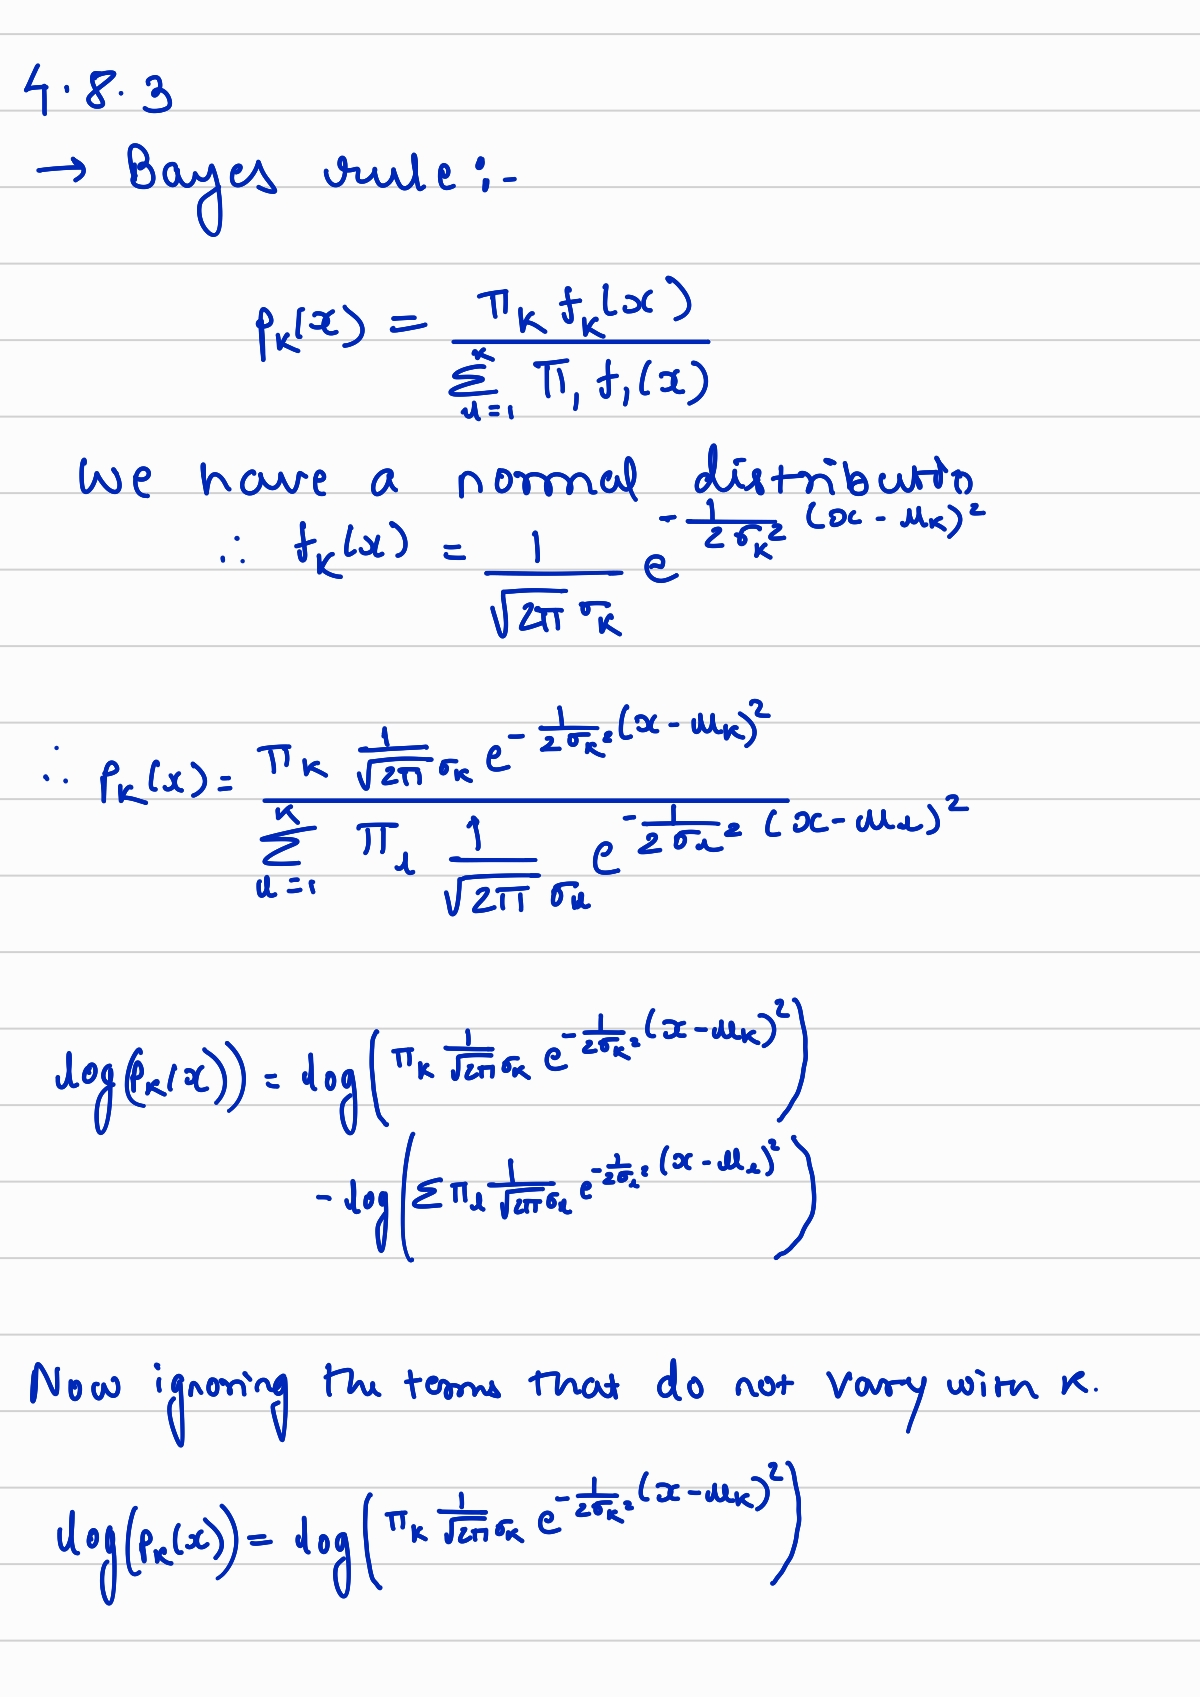

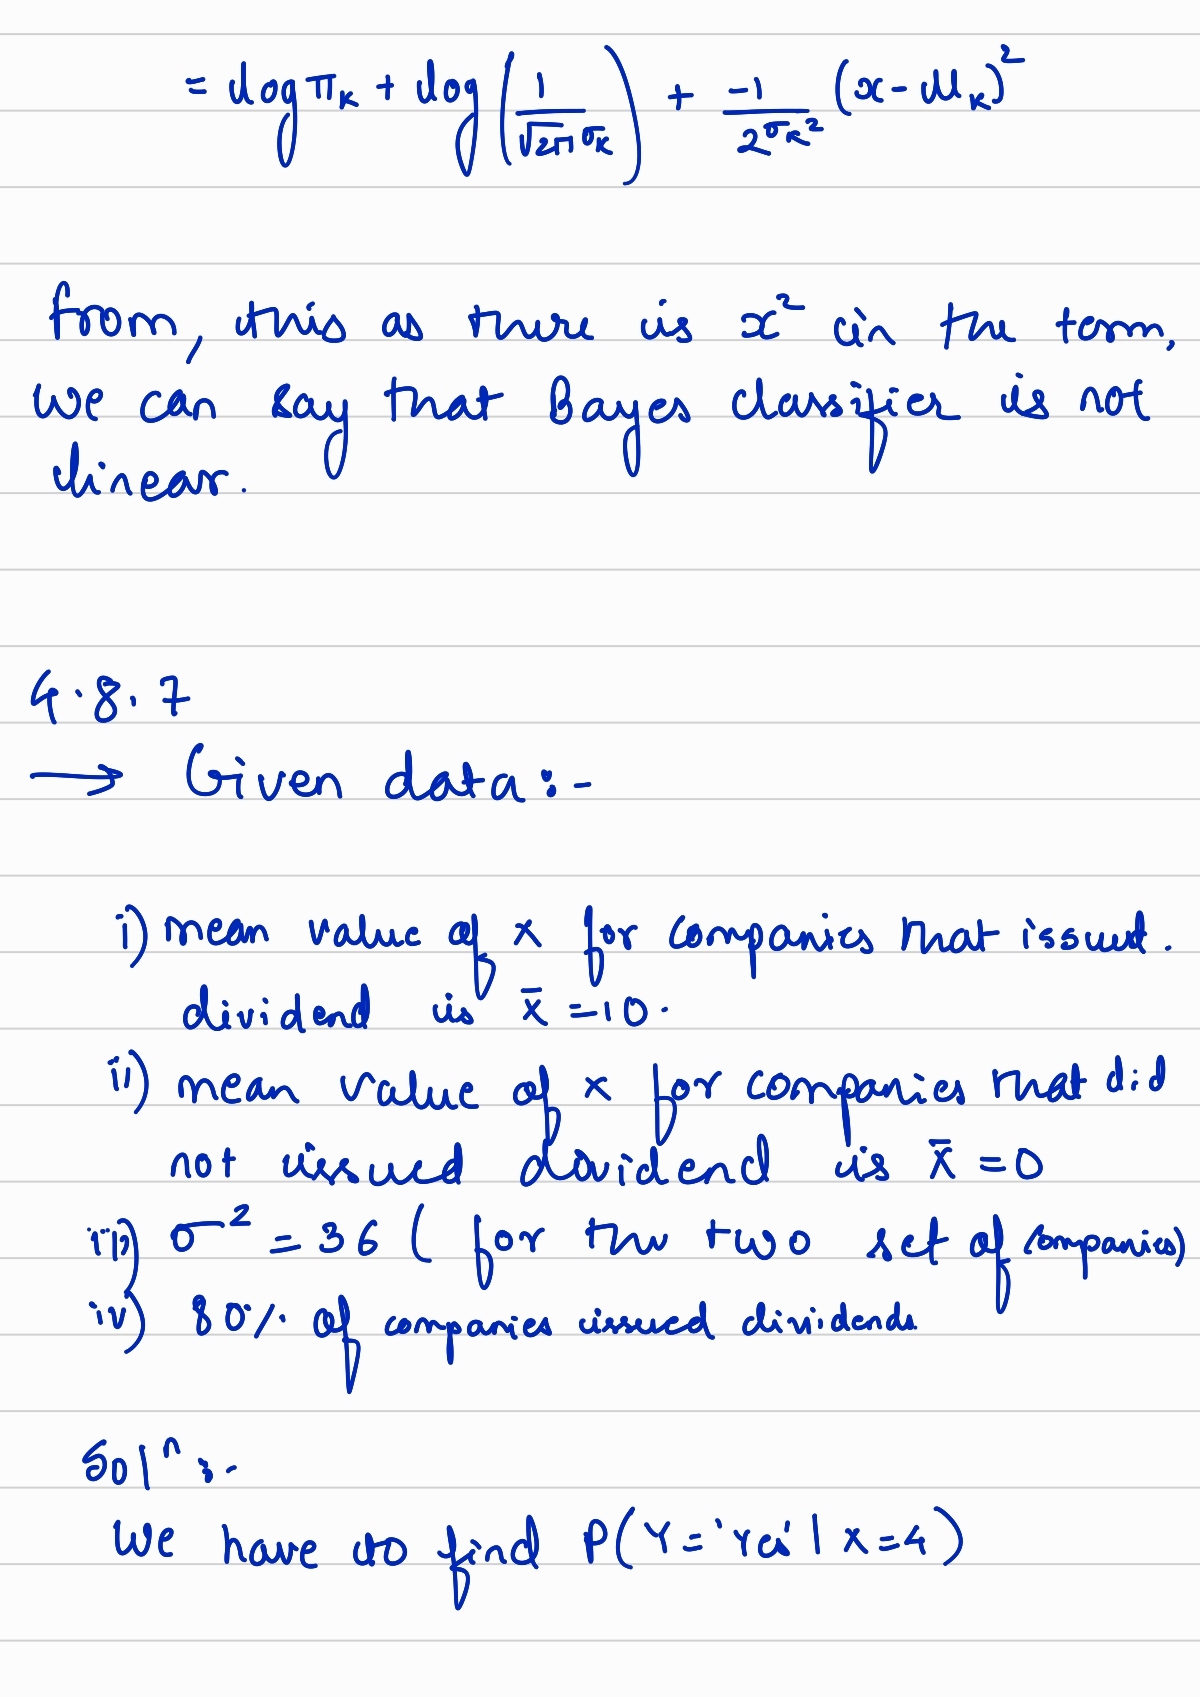

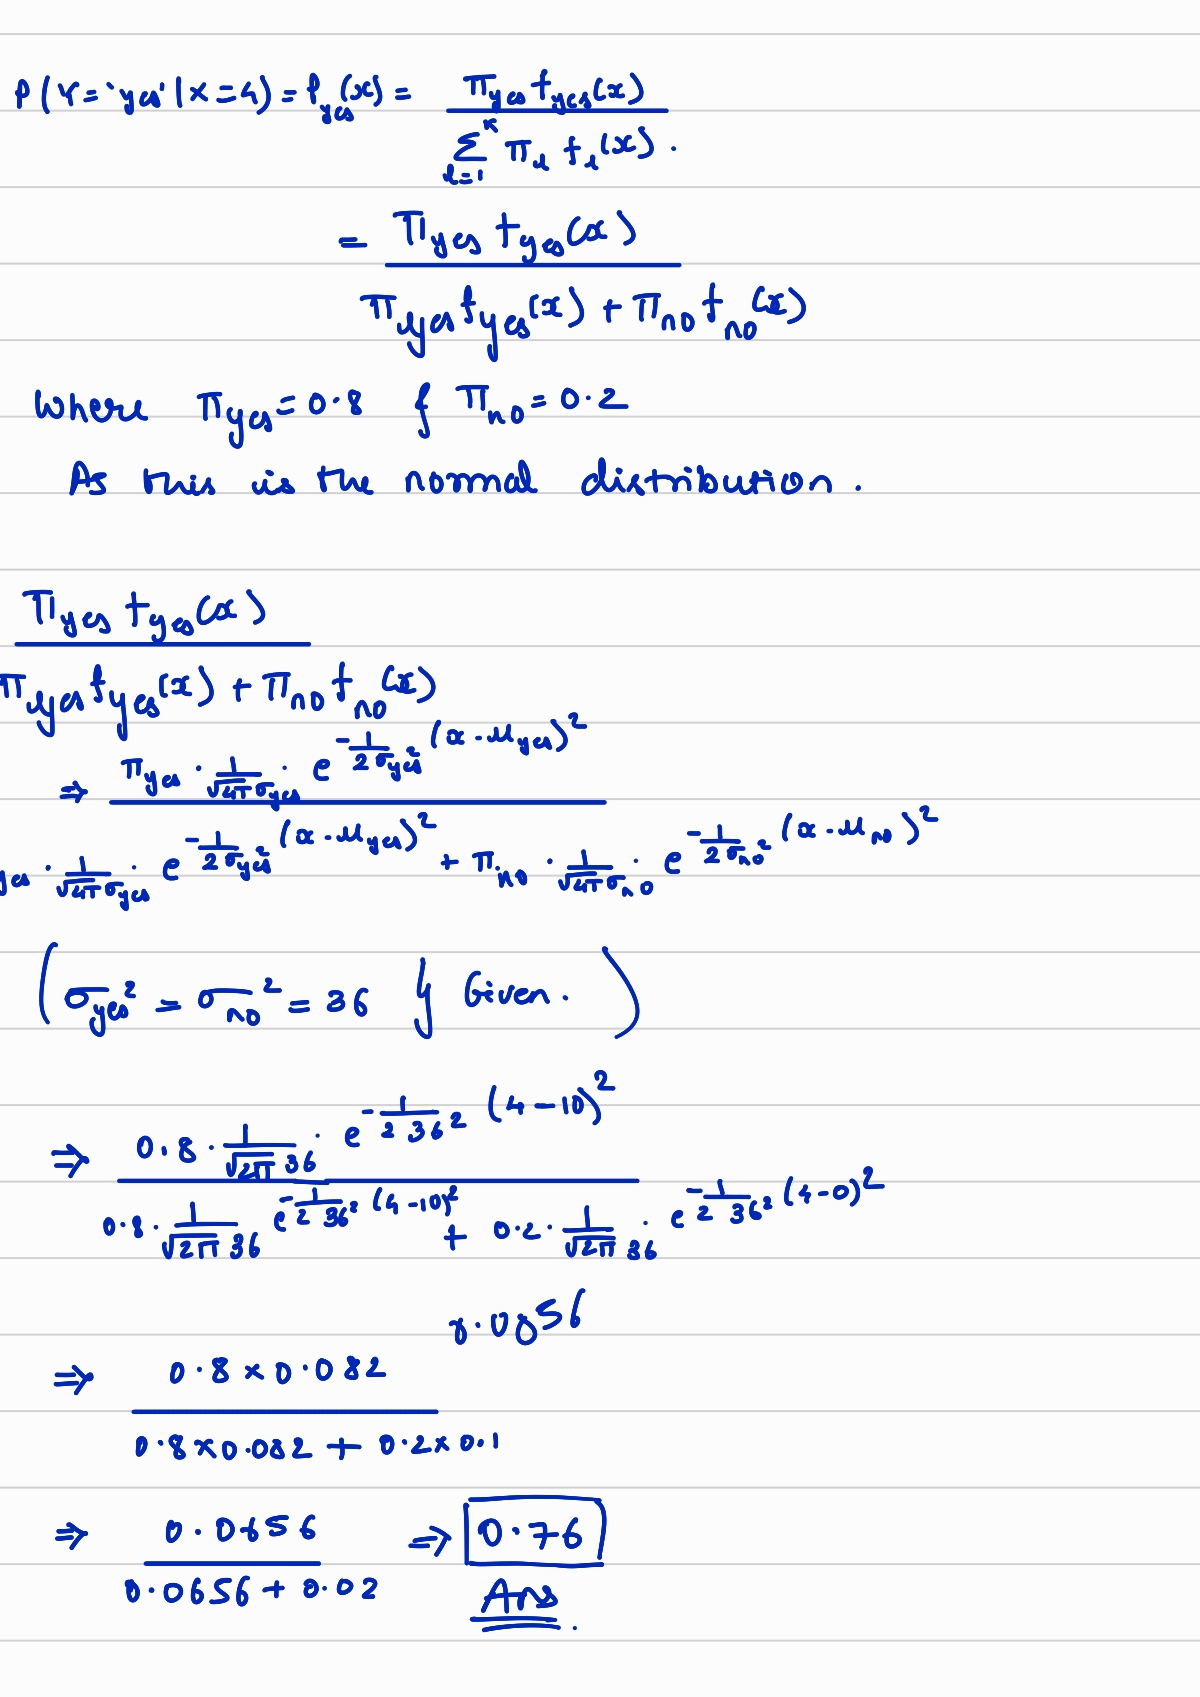